# Preparación de los datos

In [1]:
# Importamos librerías a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display
import datetime
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [2]:
# Para que no se desplieguen las advertencias
warnings.filterwarnings("ignore")

Cultivos con los que trabaja la Red BAMX.

In [3]:
# Cultivos de interés
CULTIVOS = ['Tomate rojo (jitomate)', 'Chile verde', 'Limón', 'Pepino', 'Plátano', 'Mango', 'Garbanzo', 'Brócoli', 'Cebolla', 'Sandía', 'Papaya', 'Calabacita', 'Lechuga',
            'Tomate verde', 'Espárrago', 'Frambuesa', 'Nopalitos', 'Nuez', 'Fresa', 'Toronja (pomelo)', 'Zarzamora', 'Piña', 'Coliflor', 'Frijol', 'Berenjena', 'Uva', 'Guayaba',
            'Naranja', 'Papa', 'Melón', 'Manzana', 'Pera', 'Durazno']

# Cantidad de cultivos
print(f"Cantidad de cultivos de interés: {len(CULTIVOS)}")

Cantidad de cultivos de interés: 33


## Cargar datos

### SIAP

In [4]:
# URL al archivo parquet en el repositorio
url_siap = r'/Users/luiser/Desktop/MCD/Ing Caract/Proyecto_Ing_Caract-main 3/Primera_parte/Tidy/SIAP.parquet'
# Cargar archivo parquet como DataFrame
df_siap = pd.read_parquet(url_siap)
# Inspeccionar primeros elementos del DataFrame
df_siap.head()

Entidad       Municipio Superficie Sembrada  \
0       Aguascalientes  Aguascalientes                8.00   
1  Baja California Sur          La Paz                3.00   
2               Colima      Manzanillo               86.29   
3              Durango         Durango               13.00   
4              Durango       Mezquital              110.00   

  Superficie Cosechada  Superficie Siniestrada Produccion Rendimiento  Anio  \
0                 0.00                     0.0       0.00           0  2023   
1                 0.00                     0.0       0.00           0  2023   
2                 0.00                     0.0       0.00           0  2023   
3                 0.00                     0.0       0.00           0  2023   
4                 0.00                     0.0       0.00           0  2023   

     Mes Cultivo  
0  Enero   Agave  
1  Enero   Agave  
2  Enero   Agave  
3  Enero   Agave  
4  Enero   Agave

In [5]:
# Cambiar nombre de columna "Anio" a "Año"
df_siap = df_siap.rename(columns={"Anio":"Año"})

##### Aplicar filtros

In [6]:
# Filtrar años del 2020 en adelante
df_siap = df_siap[df_siap['Año'] >= 2020]

In [7]:
# Filtrar cultivos de interés
df_siap = df_siap[df_siap['Cultivo'].isin(CULTIVOS)]

##### Dimensiones de los datos

In [8]:
# Dimensión de nuestros datos
print(f"Dimensión de los datos: {df_siap.shape}\n")

Dimensión de los datos: (387646, 10)



##### Tipos de datos

In [9]:
# Tipo de dato de cada variable
print(f"Tipo de dato de cada variable:\n {df_siap.dtypes}\n")

Tipo de dato de cada variable:
 Entidad                    object
Municipio                  object
Superficie Sembrada        object
Superficie Cosechada       object
Superficie Siniestrada    float64
Produccion                 object
Rendimiento                object
Año                         int64
Mes                        object
Cultivo                    object
dtype: object



Notamos que las variables *Superficie Sembrada*, *Superficie Cosechada*, *Producción* y *Rendimiento* son de tipo **object**, pese a que su valor es numérico

Convertimos estas variables object a flotantes

In [10]:
# Lista de variables a convertir
obj_to_float_var = ['Superficie Sembrada', 'Superficie Cosechada', 'Produccion', 'Rendimiento']

# Eliminación de ',' character y conversión a flotante
for var in obj_to_float_var:
    df_siap[var] = df_siap[var].str.replace(',','').astype('float')

# Tipo de dato de cada variable
print(f"Tipo de dato de cada variable:\n {df_siap.dtypes}\n")

Tipo de dato de cada variable:
 Entidad                    object
Municipio                  object
Superficie Sembrada       float64
Superficie Cosechada      float64
Superficie Siniestrada    float64
Produccion                float64
Rendimiento               float64
Año                         int64
Mes                        object
Cultivo                    object
dtype: object



##### Valores faltantes

In [11]:
# Valores faltantes
print(f"Valores faltantes:\n {df_siap.isna().sum()}")

Valores faltantes:
 Entidad                   0
Municipio                 0
Superficie Sembrada       0
Superficie Cosechada      0
Superficie Siniestrada    0
Produccion                0
Rendimiento               0
Año                       0
Mes                       0
Cultivo                   0
dtype: int64


Definición de constantes

In [12]:
# Orden cronológico de los meses
MESES_CRONOLOGICO = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Lista de colores para cada año
COLORES = ['#ffd343', '#42ff75', '#426eff', '#ff42cc']

# Lista de cultivos únicos
CULTIVOS_UNICOS = list(df_siap['Cultivo'].unique())

# Lista de años únicos
AÑOS_UNICOS = list(df_siap['Año'].unique())

# Lista de estado únicos
ESTADOS_UNICOS = list(df_siap['Entidad'].unique())

### SNIIM

In [13]:
# Path al archivo parquet
url_sniim = r'/Users/luiser/Desktop/MCD/Ing Caract/Proyecto_Ing_Caract-main 3/Primera_parte/Tidy/SNIIM.parquet'
# Cargar archivo parquet como DataFrame
df_sniim = pd.read_parquet(url_sniim)
# Inspeccionar primeros elementos del DataFrame
df_sniim.sample(n=5)

Fecha    Presentacion           Origen  \
465654  04/04/2023       Kilogramo          Jalisco   
294113  05/08/2022           Pieza         Guerrero   
520214  16/04/2018  Caja de 32 kg.         Guerrero   
851132  15/06/2018  Caja de 10 kg.      Importación   
2893    04/03/2020          Manojo  San Luis Potosí   

                                                  Destino  Precio Minimo  \
465654          Jalisco: Mercado de Abasto de Guadalajara          25.00   
294113  Aguascalientes: Centro Comercial Agropecuario ...          22.00   
520214  Aguascalientes: Centro Comercial Agropecuario ...           7.97   
851132       Durango: Central de Abasto "Francisco Villa"          43.00   
2893    Durango: Centro de Distribución y Abasto de Gó...          10.00   

        Precio Maximo  Precio Frecuente    Observacion              Cultivo  
465654          27.00             25.00            nan         lima_primera  
294113          25.00             23.00            nan         coco_primera  
520214           8.28              8.13            nan  mango haden_primera  
851132          45.00             44.00  Origen U.S.A.     uva pasa_primera  
2893            10.30             10.20            nan       acelga_primera

Los valores de precio están estandarizados a KG y por ende las columnas "Presentacion" y "Observacion" son remanentes que podemos eliminar

In [14]:
# Descartamos columnas Presentacion y Observacion
df_sniim = df_sniim.drop(['Presentacion', 'Observacion'], axis=1)

##### Dimensiones de los datos

In [15]:
# Dimensión de nuestros datos
print(f"Dimensión de los datos: {df_sniim.shape}")

Dimensión de los datos: (900763, 7)


##### Tipos de datos

In [16]:
# Tipo de dato de cada variable
print(f"Tipo de dato de cada variable:\n {df_sniim.dtypes}\n")

Tipo de dato de cada variable:
 Fecha                object
Origen               object
Destino              object
Precio Minimo       float64
Precio Maximo       float64
Precio Frecuente    float64
Cultivo              object
dtype: object



Notamos que la variable *Fecha* es de tipo **object**, por lo que la convertimos a **datetime** para facilitar futuros análisis

In [17]:
# Efectuar conversión especificando el formato específico de la fecha
df_sniim['Fecha'] = pd.to_datetime(df_sniim['Fecha'], format="%d/%m/%Y")
# Inspeccionar nuevamente el tipo de dato de cada variable
print(f"Tipo de dato de cada variable:\n {df_sniim.dtypes}\n")

Tipo de dato de cada variable:
 Fecha               datetime64[ns]
Origen                      object
Destino                     object
Precio Minimo              float64
Precio Maximo              float64
Precio Frecuente           float64
Cultivo                     object
dtype: object



##### Aplicar filtros

In [18]:
#Filtramos nuestro DataFrame solo para los años 2020 - 2023 
df_sniim = df_sniim[df_sniim['Fecha'].dt.year >= 2020]

Nota: a causa de la diferencia en el nombre de los cultivos entre los DataFrames, el filtrado con los cultivos de interés de la Red BAMX se dejará para más adelante

##### Valores faltantes

In [19]:
# Valores faltantes
print(f"Valores faltantes:\n {df_sniim.isna().sum()}")

Valores faltantes:
 Fecha               0
Origen              0
Destino             0
Precio Minimo       0
Precio Maximo       0
Precio Frecuente    0
Cultivo             0
dtype: int64


## Juntar DataFrames

Antes de poder juntar los DataFrames es necesario realizar ciertos pasos para homologar los datos:

- Ajustar los nombres de los estados de Origen en los datos del SNIIM
- Ajustar los nombres de los cultivos del SNIIM
- Promediar los precios del SNIIM de manera mensual
- Calcular los valores del SIAP de manera mensual

Debido a su incompatibilidad, se descartarán las columnas de *Municipio* y *Destino*, del SIAP y SNIIM, respectivamente. No obstante, estas columnas en los DataFrames originales serán utilizadas en análisis posteriores.

In [20]:
# Eliminar columna 'Destino'
df_sniim_dest = df_sniim.drop('Destino', axis=1)

# Eliminar columna 'Municipio'
df_siap_mun = df_siap.drop('Municipio', axis=1)


# En ambos casos es necesario sumar los valores numericos que coincidad en Estado, Año, Mes y Cultivo 
df_sniim_dest = df_sniim_dest.groupby(['Fecha', 'Origen', 'Cultivo'])[['Precio Minimo', 'Precio Maximo', 'Precio Frecuente']].sum().reset_index()
df_siap_mun = df_siap_mun.groupby(['Año', 'Mes', 'Entidad', 'Cultivo'])[['Superficie Sembrada', 'Superficie Cosechada', 'Superficie Siniestrada', 'Produccion', 'Rendimiento']].sum().reset_index()

##### Ajustar los nombres de los estados de Origen

In [21]:
# Evaluamos qué nombres de estado en el sniim no están en el siap
print('Estados del SNIIM no presentes en el SIAP:\n')
for estado_sniim in df_sniim_dest['Origen'].unique():
    if estado_sniim not in df_siap_mun['Entidad'].unique():
        print(estado_sniim)

Estados del SNIIM no presentes en el SIAP:

Distrito Federal
Importación
Nacional


Reemplazamos "Distrito Federal" por "Ciudad de México" tal como viene en el SIAP. Descartamos las filas con datos "Importación" y "Nacional"

In [22]:
# Creamos una copia del DataFrame
df_sniim_dest_orig = df_sniim_dest.copy()

# Reemplazamos Distrito Federal por Ciudad de México
condicion = df_sniim_dest['Origen'] == "Distrito Federal"
df_sniim_dest_orig.loc[condicion, 'Origen'] = 'Ciudad de México' 

# Descartamos la filas cuyo valor en la columna "Origen" es Importación o Nacional
df_sniim_dest_orig = df_sniim_dest_orig[(df_sniim_dest_orig['Origen'] != 'Importación') | (df_sniim_dest_orig['Origen'] != 'Nacional')]

##### Ajustar los nombres de los cultivos del SNIIM

Para esto debemos tomar como referencia la lista de cultivos ofrecida por el experto de la red BAMX.

In [23]:
# Inspeccionamos nuevamente algunos elementos de la lista de cultivos
CULTIVOS[:10]

['Tomate rojo (jitomate)',
 'Chile verde',
 'Limón',
 'Pepino',
 'Plátano',
 'Mango',
 'Garbanzo',
 'Brócoli',
 'Cebolla',
 'Sandía']

Ahora inspeccionamos los cultivos de los datos del SNIIM.

In [24]:
# Inspeccionar algunos nombres de cultivos
df_sniim_dest_orig['Cultivo'].sample(n=10)

387024                  limón c/semilla # 4_primera
162445                         nopal grande_primera
148055                             tejocote_primera
250641                                nopal_primera
234260                       chile habanero_primera
73559                     durazno melocotón_primera
129435                         sandía negra_primera
414122    limón c/semilla sin clasificación_primera
409408                                nopal_primera
404097                            cacahuate_primera
Name: Cultivo, dtype: object

El formato consiste en el nombre de los cultivos seguido por una descripción de la variedad.
Debido a que en el SIAP no se maneja variedad, para poder homologar los datos nos quedamos solamente con el nombre de los cultivos. No obstante, esto aplica solo para los cultivos cuyo nombre consiste en una sola palabra. Para los nombres con más palabras utilizamos un abordaje manual. 

In [25]:
# Nombres de cultivo con más de una palabra
[cultivo for cultivo in CULTIVOS if len(cultivo.split(' ')) > 1]

['Tomate rojo (jitomate)', 'Chile verde', 'Tomate verde', 'Toronja (pomelo)']

In [26]:
# Creamos una copia del DataFrame
df_sniim_dest_orig_cult = df_sniim_dest_orig.copy()

# Creamos una nueva columna en nuestro DataFrame para almacenar los nuevos nombres de los cultivos
df_sniim_dest_orig_cult['Cultivo SIAP'] = df_sniim_dest_orig_cult['Cultivo']

# Tomate rojo (jitomate): reemplazamos los cultivos "tomate bola_primera" y "tomate saladette_primera"

# Seleccionar filas que cumplan con la condición
condicion = df_sniim_dest_orig_cult['Cultivo SIAP'].isin(['tomate bola_primera', 'tomate saladette_primera'])

# Modificar los valores en esas filas
df_sniim_dest_orig_cult.loc[condicion, 'Cultivo SIAP'] = 'Tomate rojo (jitomate)'

# Tomate verde: reemplazamos el cultivo "tomate verde_primera"

# Seleccionar filas que cumplan con la condición
condicion = df_sniim_dest_orig_cult['Cultivo SIAP'] == 'tomate verde_primera'

# Modificar los valores en esas filas
df_sniim_dest_orig_cult.loc[condicion, 'Cultivo SIAP'] = 'Tomate verde'

# Toronja (pomelo): reemplazamos el cultivo "toronja blanca_primera", "toronja roja mediana_primera", "toronja roja_primera" y "toronja rosada_primera"

# Seleccionar filas que cumplan con la condición
condicion = df_sniim_dest_orig_cult['Cultivo SIAP'].isin(["toronja blanca_primera", "toronja roja mediana_primera", "toronja roja_primera", "toronja rosada_primera"])

# Modificar los valores en esas filas
df_sniim_dest_orig_cult.loc[condicion, 'Cultivo SIAP'] = 'Toronja (pomelo)'

# Chile verde: reemplazamos el cultivo 'chile anaheim_primera', 'chile california_primera', 'chile chilaca_primera', 'chile serrano_primera', 'chile poblano_primera', 'chile jalapeño_primera' y 'chile habanero_primera'

# Seleccionar filas que cumplan con la condición
condicion = df_sniim_dest_orig_cult['Cultivo SIAP'].isin(['chile anaheim_primera', 'chile california_primera', 'chile chilaca_primera', 'chile serrano_primera', 'chile poblano_primera',
                                       'chile jalapeño_primera', 'chile habanero_primera'])

# Modificar los valores en esas filas
df_sniim_dest_orig_cult.loc[condicion, 'Cultivo SIAP'] = 'Chile verde'

# Nopalitos: en el SNIIM vienen solamente como Nopal

# Seleccionar filas que cumplan con la condición
condicion = df_sniim_dest_orig_cult['Cultivo SIAP'].isin(['nopal grande_primera', 'nopal_primera'])

# Modificar los valores en esas filas
df_sniim_dest_orig_cult.loc[condicion, 'Cultivo SIAP'] = 'Nopalitos'

Podemos automatizar el ajuste de los nombres de cultivo con una sola palabra utilizando expresiones regulares

In [27]:
# Condición para ignorar los cultivos que ya modificamos
condicion = ~df_sniim_dest_orig_cult['Cultivo SIAP'].isin(['Tomate rojo (jitomate)', 'Tomate verde', 'Toronja (pomelo)', 'Nopalitos', 'Chile verde'])

# Expresión regular para capturar la primera palabra
pattern = r'^([^\W_]+)'

# Aplicar la expresión regular para mantener solo la primera palabra
df_sniim_dest_orig_cult.loc[condicion, 'Cultivo SIAP'] = df_sniim_dest_orig_cult[condicion]['Cultivo SIAP'].str.extract(pattern).values

# Reemplazar la primera letra por mayúscula
df_sniim_dest_orig_cult.loc[condicion, 'Cultivo SIAP'] = df_sniim_dest_orig_cult.loc[condicion, 'Cultivo SIAP'].str.title()

# Inspeccionar nuevamente algunos nombres de cultivos
df_sniim_dest_orig_cult['Cultivo SIAP'].sample(n=10)

303014                     Melón
191689                      Haba
431732                   Lechuga
71192           Toronja (pomelo)
226852                     Melon
5189      Tomate rojo (jitomate)
294982                   Betabel
69239                 Calabacita
422689                      Papa
307181                      Apio
Name: Cultivo SIAP, dtype: object

Utilizamos nuevamente la lista de cultivos para filtrar el DataFrame

In [28]:
# Filtramos el DataFrame para quedarnos solo con los cultivos de interés
df_sniim_dest_orig_cult = df_sniim_dest_orig_cult[df_sniim_dest_orig_cult['Cultivo SIAP'].isin(CULTIVOS)]

# Dimensión de nuestros datos
print(f"Dimensión de los datos: {df_sniim_dest_orig_cult.shape}")

# Inspeccionamos el DataFrame
df_sniim_dest_orig_cult.sample(n=5)

Dimensión de los datos: (252920, 7)


Fecha           Origen                          Cultivo  \
45949  2020-05-11   Aguascalientes      calabacita regional_primera   
265065 2022-05-19          Chiapas           papaya maradol_primera   
301524 2022-09-05  Baja California  lechuga romanita grande_primera   
330816 2022-12-06         Veracruz  naranja valencia grande_primera   
230395 2022-01-31          Jalisco               papa alpha_primera   

        Precio Minimo  Precio Maximo  Precio Frecuente Cultivo SIAP  
45949            20.0          20.00             20.00   Calabacita  
265065           20.0          22.00             22.00       Papaya  
301524           12.5          28.33             17.08      Lechuga  
330816            1.6           1.80              1.60      Naranja  
230395           20.0          20.00             20.00         Papa

Debido a la manipulación que realizamos con los cultivos del SNIIM para homologarlos con los del SIAP, es posible que un mismo cultivo presente distintos precios para una misma fecha. Para abordar esto, identificamos los casos en los que estos sucede y promediamos los precios asociados a una misma fecha.

##### Promedio mensual de precios SNIIM

In [29]:
# Desglosar la columna Fecha en dos columnas adicionales para el año y el mes
df_sniim_dest_orig_cult['Año'] = df_sniim_dest_orig_cult['Fecha'].dt.year
df_sniim_dest_orig_cult['Mes'] = df_sniim_dest_orig_cult['Fecha'].dt.month

# Agrupar por Año, Mes, Origen, Destino y Cultivo SIAP, y calcular el promedio de los precios
df_sniim_dest_orig_cult_mens = df_sniim_dest_orig_cult.groupby(['Año', 'Mes', 'Origen', 'Cultivo SIAP'])[['Precio Minimo', 'Precio Maximo', 'Precio Frecuente']].mean().reset_index()

# Diccionario para mapear números de mes a nombres de mes
meses_dict = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
}

# Aplicar el mapeo a la columna 'Mes'
df_sniim_dest_orig_cult_mens['Mes'] = df_sniim_dest_orig_cult_mens['Mes'].map(meses_dict)

# DataFrame resultante
df_sniim_dest_orig_cult_mens

Año      Mes          Origen  Cultivo SIAP  Precio Minimo  \
0     2020    Enero  Aguascalientes       Brócoli      11.181818   
1     2020    Enero  Aguascalientes    Calabacita      17.657846   
2     2020    Enero  Aguascalientes      Coliflor      12.045455   
3     2020    Enero  Aguascalientes       Guayaba       8.750000   
4     2020    Enero  Aguascalientes       Lechuga       5.363636   
...    ...      ...             ...           ...            ...   
8905  2023  Octubre       Zacatecas       Cebolla      30.000000   
8906  2023  Octubre       Zacatecas   Chile verde      26.988235   
8907  2023  Octubre       Zacatecas       Lechuga      12.882353   
8908  2023  Octubre       Zacatecas  Tomate verde       9.777778   
8909  2023  Octubre       Zacatecas           Uva      23.333333   

      Precio Maximo  Precio Frecuente  
0         13.181818         12.181818  
1         18.956615         18.454923  
2         14.045455         13.045455  
3          9.584091          9.165909  
4          7.363636          6.363636  
...             ...               ...  
8905      38.000000         38.000000  
8906      31.576471         29.564706  
8907      12.882353         12.882353  
8908      12.666667         11.500000  
8909      27.333333         25.666667  

[8910 rows x 7 columns]

##### Obtención de producción mensual

Por defecto, el SIAP arroja los datos numéricos (Superficie Sembrada, Superficie Cosechada, Superficie Siniestrada, Produccion, Rendimiento) de manera acumulativa. Esto implica que los valores de, por ejemplo Febrero, son los valores de Enero más los de Febrero; los valores de Marzo son los valores de Enero, más los de Febrero, más los de Marzo; y así sucesivamente. Nosotros esatmos interesados en analizar los valores de manera mensual y por ende, es necesario que a los valores de cada mes le restemos los valores de los meses previos.

In [30]:
# Ordenamos el DataFrame con base en el orden cronológico de los meses
df_siap_mun['Mes'] = pd.Categorical(df_siap_mun['Mes'], categories=MESES_CRONOLOGICO, ordered=True)  # Convertir 'Mes' en una categoría con el orden cronológico
df_siap_mun = df_siap_mun.sort_values(by='Mes')  # Ordenar DataFrame con base en la columna 'Mes'

# Crear DataFrame en el que almacenaremos la producción mensual no acumulativa
df_siap_diff = pd.DataFrame(columns=df_siap_mun.columns)

# Iteramos por año
for año in AÑOS_UNICOS[::-1]:

    # Iteramos por estado
    for estado in ESTADOS_UNICOS:
        
        # Iteramos por cultivo
        for cultivo in CULTIVOS_UNICOS:

            # Datos del estado, año y cultivo en turno
            df_ent_year_cult = df_siap_mun[(df_siap_mun['Entidad'] == estado) & (df_siap_mun['Año'] == año) & (df_siap_mun['Cultivo'] == cultivo)]

            # Resta de valores de meses previos
            df_ent_year_cult['Superficie Sembrada'] = df_ent_year_cult['Superficie Sembrada'].diff().fillna(df_ent_year_cult['Superficie Sembrada'])
            df_ent_year_cult['Superficie Cosechada'] = df_ent_year_cult['Superficie Cosechada'].diff().fillna(df_ent_year_cult['Superficie Cosechada'])
            df_ent_year_cult['Superficie Siniestrada'] = df_ent_year_cult['Superficie Siniestrada'].diff().fillna(df_ent_year_cult['Superficie Siniestrada'])
            df_ent_year_cult['Produccion'] = df_ent_year_cult['Produccion'].diff().fillna(df_ent_year_cult['Produccion'])
            #df_ent_year_cult['Rendimiento'] = df_ent_year_cult['Rendimiento'].diff().fillna(df_ent_year_cult['Rendimiento'])

            # Alamacenar resultados en el nuevo DataFrame
            df_siap_diff = pd.concat([df_siap_diff, df_ent_year_cult], axis=0)

            df_siap_diff = df_siap_diff.reset_index(drop=True)

# Inspeccionamos el nuevo DataFrame
df_siap_diff

Año         Mes              Entidad    Cultivo  Superficie Sembrada  \
0      2020       Enero  Baja California Sur  Berenjena                 11.0   
1      2020     Febrero  Baja California Sur  Berenjena                  0.0   
2      2020       Marzo  Baja California Sur  Berenjena                  8.5   
3      2020       Abril  Baja California Sur  Berenjena                  0.8   
4      2020        Mayo  Baja California Sur  Berenjena                  1.0   
...     ...         ...                  ...        ...                  ...   
29271  2023        Mayo           Nuevo León        Uva                  0.0   
29272  2023       Junio           Nuevo León        Uva                  0.0   
29273  2023       Julio           Nuevo León        Uva                  0.0   
29274  2023      Agosto           Nuevo León        Uva                  0.0   
29275  2023  Septiembre           Nuevo León        Uva                  0.0   

       Superficie Cosechada  Superficie Siniestrada  Produccion  Rendimiento  
0                      0.00                     0.0        0.00         0.00  
1                      1.50                     0.0       27.30        18.20  
2                      1.00                     0.0       19.00        18.52  
3                      0.25                     0.0        4.70        18.55  
4                      0.25                     0.0        4.75        18.58  
...                     ...                     ...         ...          ...  
29271                  0.00                     0.0        0.00         0.00  
29272                  0.00                     0.0        0.00         0.00  
29273                  4.10                     0.0       12.95         6.33  
29274                  0.00                     0.0        0.00         6.33  
29275                  2.00                     0.0        3.40         8.03  

[29276 rows x 9 columns]

##### Juntamos los DataFrames

In [31]:
# Realizar el merge
df_merge = pd.merge(
    df_siap_diff,
    df_sniim_dest_orig_cult_mens,
    how='inner',
    left_on=['Año', 'Mes', 'Entidad', 'Cultivo'],
    right_on=['Año', 'Mes', 'Origen', 'Cultivo SIAP']
)

# Eliminar las columnas duplicadas (puedes ajustar según tus necesidades)
df_merge = df_merge.drop(['Origen', 'Cultivo SIAP'], axis=1)

# Mostrar el DataFrame resultante
df_merge.head()

Año      Mes              Entidad      Cultivo  Superficie Sembrada  \
0  2020    Enero  Baja California Sur  Chile verde              1203.50   
1  2020  Febrero  Baja California Sur  Chile verde                48.00   
2  2020    Marzo  Baja California Sur  Chile verde                55.25   
3  2020    Abril  Baja California Sur  Chile verde                59.40   
4  2020     Mayo  Baja California Sur  Chile verde                54.15   

   Superficie Cosechada  Superficie Siniestrada  Produccion  Rendimiento  \
0                 44.00                     0.0     1000.00        45.96   
1                409.20                     0.0    19294.69       120.63   
2                238.70                     0.0     9918.11       123.70   
3                370.00                     0.0    19676.22       194.05   
4                 89.55                     0.0     4448.45       203.06   

   Precio Minimo  Precio Maximo  Precio Frecuente  
0      18.000000          22.00         18.000000  
1      17.684211          22.00         17.684211  
2      15.000000          22.45         18.750000  
3      15.000000          25.00         19.500000  
4      15.000000          25.00         17.000000

In [71]:

#Agrego columna para calcular la producción siniestrada. 
#Para obtenerlo, multiplicamos el rendimiento por la superficie siniestrada. 
df_merge['Produccion Siniestrada']=df_merge['Superficie Siniestrada']*df_merge['Rendimiento']
#Agrego columna para que nos muestre el Valor monetario total de la producción ('Precio Total')
#Lo obtenemos multiplicando la producción por el precio frecuente. Dividimos para obtener cantidad en MDP. 
df_merge['Precio total']=(df_merge['Produccion']*df_merge['Precio Frecuente'])/1000000
#Creamos otra para la el valor total de la producción siniestrada. 
#Para ésta usamos el rendimiento, por la superficie siniestrada, por el precio frecuente. Dividimos para obtener cantidad en MDP.  
df_merge['Precio total Siniestrado (MDP)']=((df_merge['Rendimiento']*df_merge['Superficie Siniestrada'])*df_merge['Precio Frecuente'])/1000000
#Creamos otra métrica de 'Rendimiento económico'
#Calculamos usando el rendimiento por Unidad de superficie, por el precio frecuente. 
df_merge['Rendimiento Económico']=(df_merge['Rendimiento']*df_merge['Precio Frecuente'])/1000

df_merge.head()

Año         Mes     Entidad      Cultivo  Superficie Sembrada  \
2648  2021  Septiembre     Jalisco  Chile verde               594.00   
3866  2022       Enero     Sinaloa  Chile verde             15039.37   
1257  2020     Octubre   Zacatecas  Chile verde                 0.00   
164   2020       Enero     Sinaloa  Chile verde             14172.47   
4437  2022   Diciembre  Guanajuato      Cebolla                 0.00   

      Superficie Cosechada  Superficie Siniestrada  Produccion  Rendimiento  \
2648                 58.00                 1500.00     7582.62       469.91   
3866               3784.97                  953.00   123061.82       233.45   
1257               7603.40                  253.67    96746.10       342.12   
164                8397.18                   47.50   248221.90       352.88   
4437                310.00                   30.00    12780.00       870.28   

      Precio Minimo  Precio Maximo  Precio Frecuente  Produccion Siniestrada  \
2648      36.666667      50.490196         44.803922             704865.0000   
3866      37.209524      42.407483         41.122449             222477.8500   
1257      25.554545      27.927273         26.745455              86785.5804   
164       68.267045      73.295455         72.211364              16761.8000   
4437      29.474762      36.920476         35.760476              26108.4000   

      Precio total  Precio total Siniestrado (MDP)  Rendimiento Económico  
2648      0.339731                       31.580716              21.053811  
3866      5.060603                        9.148834               9.600036  
1257      2.587518                        2.321120               9.150155  
164      17.924442                        1.210392              25.481946  
4437      0.457019                        0.933649              31.121627

In [33]:
df_merge_entidades = df_merge.groupby(['Entidad','Cultivo','Año'])['Precio total Siniestrado (MDP)'].sum() 
df_merge_entidades.head(20)

Entidad         Cultivo     Año 
Aguascalientes  Brócoli     2020    0.000000
                            2021    0.006055
                            2022    0.000000
                            2023    0.065625
                Calabacita  2021    0.000000
                            2022    0.000000
                            2023    0.000000
                Coliflor    2020    0.000000
                            2021    0.000000
                            2022    0.000000
                            2023    0.000000
                Durazno     2023    0.000000
                Guayaba     2020    0.000000
                            2021    0.000000
                            2022    0.000000
                            2023    0.000000
                Lechuga     2020    0.000000
                            2021    0.000000
                            2022    0.000000
                            2023    0.000000
Name: Precio total Siniestrado (MDP), dtype: float64

In [72]:
df_merge=df_merge.sort_values(by=['Rendimiento Económico'], ascending=False)
df_merge.head(30)

Año         Mes     Entidad                 Cultivo  \
2584  2021   Diciembre  Guanajuato                   Fresa   
2583  2021   Noviembre  Guanajuato                   Fresa   
722   2020     Octubre  Guanajuato                   Fresa   
4671  2022   Diciembre     Jalisco  Tomate rojo (jitomate)   
724   2020   Diciembre  Guanajuato                   Fresa   
4446  2022   Diciembre  Guanajuato                   Fresa   
721   2020  Septiembre  Guanajuato                   Fresa   
2582  2021     Octubre  Guanajuato                   Fresa   
2581  2021  Septiembre  Guanajuato                   Fresa   
4445  2022   Noviembre  Guanajuato                   Fresa   
4444  2022     Octubre  Guanajuato                   Fresa   
2580  2021      Agosto  Guanajuato                   Fresa   
4443  2022  Septiembre  Guanajuato                   Fresa   
4514  2022   Diciembre     Jalisco             Chile verde   
4670  2022   Noviembre     Jalisco  Tomate rojo (jitomate)   
6172  2023      Agosto  Guanajuato                   Fresa   
2579  2021       Julio  Guanajuato                   Fresa   
2651  2021   Diciembre     Jalisco             Chile verde   
4442  2022      Agosto  Guanajuato                   Fresa   
723   2020   Noviembre  Guanajuato                   Fresa   
6171  2023       Julio  Guanajuato                   Fresa   
2578  2021       Junio  Guanajuato                   Fresa   
4834  2022   Diciembre   Michoacán                  Papaya   
3955  2022   Noviembre      Sonora             Chile verde   
4441  2022       Julio  Guanajuato                   Fresa   
6475  2023       Junio   Michoacán                  Papaya   
6477  2023      Agosto   Michoacán                  Papaya   
6173  2023  Septiembre  Guanajuato                   Fresa   
936   2020   Diciembre     Jalisco  Tomate rojo (jitomate)   
6170  2023       Junio  Guanajuato                   Fresa   

      Superficie Sembrada  Superficie Cosechada  Superficie Siniestrada  \
2584                  0.0                  0.00                     0.0   
2583                  0.0                  0.00                     0.0   
722                   0.0                  0.00                     0.0   
4671                  0.0                 17.57                     0.0   
724                   0.0                  0.00                     0.0   
4446                  0.0                  0.00                     0.0   
721                   0.0                  0.00                     0.0   
2582                  0.0                  0.00                     0.0   
2581                  0.0                  0.00                     0.0   
4445                  0.0                  0.00                     0.0   
4444                  0.0                  0.00                     0.0   
2580                  0.0                  0.00                     0.0   
4443                  0.0                  0.00                     0.0   
4514                  0.0                487.50                     0.0   
4670                  0.0                250.83                     0.0   
6172                  0.0                  0.00                     0.0   
2579                  0.0                  0.00                     0.0   
2651                  0.0                369.00                     0.0   
4442                  0.0                  0.00                     0.0   
723                   0.0                  0.00                     0.0   
6171                  0.0                  0.00                     0.0   
2578                  0.0                  0.00                     0.0   
4834                  0.0                  0.00                     0.0   
3955                  0.0                876.00                     8.0   
4441                  0.0                  0.00                     0.0   
6475                  0.0                  0.00                     0.0   
6477                  0.0                  0.00            

## Nos enfocamos en información de Sonora. 

In [77]:
#Filtramos para enfocarnos en la información de Sonora. 
df_merge_Sonora= df_merge[df_merge["Entidad"].isin(["Sonora"])]
df_merge_Sonora.head()
df_merge_Sonora=df_merge_Sonora.sort_values(by=['Rendimiento Económico'], ascending=False)
df_merge_Sonora.head(30)

Año         Mes Entidad      Cultivo  Superficie Sembrada  \
3955  2022   Noviembre  Sonora  Chile verde                 0.00   
3956  2022   Diciembre  Sonora  Chile verde                 0.00   
3954  2022     Octubre  Sonora  Chile verde                 0.00   
2062  2021   Noviembre  Sonora  Chile verde                 0.00   
2061  2021     Octubre  Sonora  Chile verde                 0.00   
5780  2023      Agosto  Sonora  Chile verde               429.00   
5781  2023  Septiembre  Sonora  Chile verde               788.00   
293   2020   Noviembre  Sonora          Uva                 0.00   
292   2020     Octubre  Sonora          Uva                 0.00   
3953  2022  Septiembre  Sonora  Chile verde              1494.00   
294   2020   Diciembre  Sonora          Uva                 0.00   
2063  2021   Diciembre  Sonora  Chile verde                 0.00   
233   2020        Mayo  Sonora  Chile verde               765.10   
232   2020       Abril  Sonora  Chile verde               100.00   
5779  2023       Julio  Sonora  Chile verde                74.00   
239   2020   Diciembre  Sonora  Chile verde                 0.00   
3996  2022   Noviembre  Sonora          Uva                 0.00   
237   2020     Octubre  Sonora  Chile verde                 0.00   
5778  2023       Junio  Sonora  Chile verde                89.00   
3997  2022   Diciembre  Sonora          Uva                 0.00   
5777  2023        Mayo  Sonora  Chile verde                64.00   
238   2020   Noviembre  Sonora  Chile verde                 0.00   
3950  2022       Junio  Sonora  Chile verde               121.00   
291   2020  Septiembre  Sonora          Uva                 0.00   
236   2020  Septiembre  Sonora  Chile verde               394.00   
231   2020       Marzo  Sonora  Chile verde               497.00   
3951  2022       Julio  Sonora  Chile verde                24.00   
3948  2022       Abril  Sonora  Chile verde               185.33   
3995  2022     Octubre  Sonora          Uva                 0.00   
3949  2022        Mayo  Sonora  Chile verde                51.00   

      Superficie Cosechada  Superficie Siniestrada  Produccion  Rendimiento  \
3955                876.00                     8.0    44272.50       646.60   
3956                682.00                     0.0    39966.00       664.91   
3954                169.00                     0.0     3191.50       567.60   
2062                534.00                     0.0    24648.10       613.44   
2061                133.00                     0.0     3439.00       527.39   
5780                 16.33                     0.0     1606.70       456.03   
5781                 10.00                     0.0     1000.07       456.16   
293                  15.00                     0.0       18.00       196.59   
292                   0.00                     0.0      456.00       195.39   
3953                 25.00                     0.0     2450.00       445.64   
294                   0.00                     0.0        2.00       196.72   
2063                362.00                     0.0    18919.80       613.15   
233                 527.70                     0.0    20431.51       376.57   
232                 644.50                     0.0    36575.11       345.96   
5779                120.00                     0.0     7665.00       456.67   
239                 358.00                     0.0    19181.70       666.97   
3996                  0.00                     0.0        0.00       212.81   
237                 317.80                     0.0    11801.50       580.06   
5778                537.00                     0.0    38037.00       349.64   
3997                 15.00                     0.0       75.00       217.81   
5777                285.00                     0.0    12650.50       333.82   
238                 229.50                     0.0     5828.50       658.76   
3950                337.33                     0.0    14762.00       357.24   
29

In [36]:
df_merge_Sonora=df_merge_Sonora.sort_values(by=['Superficie Siniestrada'], ascending=False)
df_merge_Sonora.head(10)

Año        Mes Entidad                 Cultivo  Superficie Sembrada  \
228   2020    Febrero  Sonora                 Cebolla                92.41   
272   2020  Diciembre  Sonora                  Sandía                 0.00   
264   2020  Noviembre  Sonora                    Papa                 0.00   
3955  2022  Noviembre  Sonora             Chile verde                 0.00   
230   2020    Febrero  Sonora             Chile verde               273.00   
271   2020     Agosto  Sonora                  Sandía              1583.00   
256   2020  Noviembre  Sonora                    Nuez                 0.00   
281   2020      Abril  Sonora        Toronja (pomelo)                 0.00   
280   2020      Marzo  Sonora        Toronja (pomelo)                 0.00   
279   2020  Diciembre  Sonora  Tomate rojo (jitomate)                 0.00   

      Superficie Cosechada  Superficie Siniestrada  Produccion  Rendimiento  \
228                 131.00                    21.0     3356.12       148.16   
272                 735.00                    15.0    62366.00       650.68   
264                 323.00                    10.0    13521.00       610.97   
3955                876.00                     8.0    44272.50       646.60   
230                 605.10                     3.0    17593.83       223.23   
271                  56.27                     0.0     3904.87       474.72   
256                4248.70                     0.0     8565.61        57.00   
281                 251.00                     0.0     5806.90       109.46   
280                  65.00                     0.0     2550.00        30.00   
279                  39.00                     0.0     3195.00       998.43   

      Precio Minimo  Precio Maximo  Precio Frecuente  Produccion Siniestrada  \
228       11.200000      13.000000         13.000000                 3111.36   
272        8.194444       8.277778          8.277778                 9760.20   
264       16.815789      18.552632         17.684211                 6109.70   
3955     124.150000     129.150000        127.300000                 5172.80   
230       71.447368      75.394737         73.921053                  669.69   
271        4.000000       4.000000          4.000000                    0.00   
256       80.000000      85.000000         85.000000                    0.00   
281       10.850000      10.850000         10.850000                    0.00   
280       17.190476      17.190476         17.190476                    0.00   
279       13.155333      14.755333         13.910667                    0.00   

      Precio total  Precio total Siniestrado (MDP)  
228       0.043630                        0.040448  
272       0.516252                        0.080793  
264       0.239108                        0.108045  
3955      5.635889                        0.658497  
230       1.300554                        0.049504  
271       0.015619                        0.000000  
256       0.728077                        0.000000  
281       0.063005                        0.000000  
280       0.043836                        0.000000  
279       0.044445                        0.000000

##### Definimos constantes

In [37]:
# Lista de variables numéricas en el DataFrame
VARIABLES_NUMERICAS = ["Superficie Sembrada", "Superficie Cosechada", "Superficie Siniestrada", "Produccion", "Rendimiento",
                       "Precio Minimo", "Precio Maximo", "Precio Frecuente"]

## Detección de outliers

Primero inspeccionamos las variables numéricas de nuestros datos para una identificación burda de posibles outliers.

In [38]:
# Descripción de variables numéricas
df_merge.drop(columns='Año', axis=1).describe()

Superficie Sembrada  Superficie Cosechada  Superficie Siniestrada  \
count          7052.000000           7052.000000             7052.000000   
mean            658.422808            601.746747                0.715231   
std            5679.829604           3142.816796               22.206281   
min            -292.200000              0.000000                0.000000   
25%               0.000000              0.000000                0.000000   
50%               0.000000              1.500000                0.000000   
75%               7.625000            150.697500                0.000000   
max          170717.070000          90396.930000             1500.000000   

          Produccion  Rendimiento  Precio Minimo  Precio Maximo  \
count    7052.000000  7052.000000    7052.000000    7052.000000   
mean    11446.082221   185.212796      28.171976      32.588552   
std     34062.908017   247.341494      31.799290      34.769725   
min        -0.010000     0.000000       0.550000       0.650000   
25%         0.000000    15.480000      13.000000      15.000000   
50%       620.000000    86.000000      18.859303      22.954545   
75%      8535.007500   253.630000      30.280000      36.818182   
max    718771.580000  2582.000000     370.000000     391.000000   

       Precio Frecuente  Produccion Siniestrada  Precio total  \
count       7052.000000             7052.000000  7.052000e+03   
mean          30.771912              206.600399  3.480731e-01   
std           33.724971             8949.995987  1.163825e+00   
min            0.580000                0.000000 -2.819857e-07   
25%           14.235446                0.000000  0.000000e+00   
50%           21.110794                0.000000  1.125026e-02   
75%           33.967995                0.000000  1.642227e-01   
max          380.000000           704865.000000  1.906051e+01   

       Precio total Siniestrado (MDP)  
count                     7052.000000  
mean                         0.007599  
std                          0.393636  
min                          0.000000  
25%                          0.000000  
50%                          0.000000  
75%                          0.000000  
max                         31.580716

Notamos que los valores mínimos de Superficie Sembrada y de Producción son negativos, lo cual no tiene sentido. Contamos la cantidad de valores negativos en estas dos variables, con el objetivo de identificar si cometimos un error en el cálculo de los valores mensuales, o si simplemente se trata de que hubo errores a la hora de registrar los datos. 

In [39]:
print(f"Cantidad de valores negativos en Superficie Sembrada: {sum(df_merge['Superficie Sembrada'] < 0)}\n")
print(f"Cantidad de valores negativos en Produccion: {sum(df_merge['Produccion'] < 0)}")

Cantidad de valores negativos en Superficie Sembrada: 2

Cantidad de valores negativos en Produccion: 1


Debido a la pequeña cantidad de valores faltantes, lo más factible es que se hayan cometido errores a la hora de registrar los datos. Por lo tanto, podemos simplemente eliminar estos valores negativos y continuar con el análisis.

In [40]:
# Descartamos filas con valores valores negativos
df_merge  = df_merge[(df_merge['Superficie Sembrada'] >= 0) & (df_merge['Produccion'] >= 0)]

# Descripción de variables numéricas
df_merge.drop(columns='Año', axis=1).describe()

Superficie Sembrada  Superficie Cosechada  Superficie Siniestrada  \
count          7049.000000           7049.000000             7049.000000   
mean            658.744484            601.808115                0.715536   
std            5681.016172           3143.455842               22.211001   
min               0.000000              0.000000                0.000000   
25%               0.000000              0.000000                0.000000   
50%               0.000000              1.500000                0.000000   
75%               8.000000            150.680000                0.000000   
max          170717.070000          90396.930000             1500.000000   

          Produccion  Rendimiento  Precio Minimo  Precio Maximo  \
count    7049.000000  7049.000000    7049.000000    7049.000000   
mean    11441.784867   185.156147      28.166463      32.583318   
std     34063.720519   247.315156      31.803284      34.774044   
min         0.000000     0.000000       0.550000       0.650000   
25%         0.000000    15.480000      13.000000      15.000000   
50%       620.000000    86.000000      18.851429      22.952632   
75%      8529.010000   253.470000      30.280000      36.818182   
max    718771.580000  2582.000000     370.000000     391.000000   

       Precio Frecuente  Produccion Siniestrada  Precio total  \
count       7049.000000             7049.000000   7049.000000   
mean          30.766632              206.688327      0.347602   
std           33.729270             8951.899564      1.163074   
min            0.580000                0.000000      0.000000   
25%           14.227500                0.000000      0.000000   
50%           21.100000                0.000000      0.011253   
75%           33.965263                0.000000      0.164193   
max          380.000000           704865.000000     19.060511   

       Precio total Siniestrado (MDP)  
count                     7049.000000  
mean                         0.007602  
std                          0.393720  
min                          0.000000  
25%                          0.000000  
50%                          0.000000  
75%                          0.000000  
max                         31.580716

In [41]:
# # Configuración de estilo de seaborn
# sns.set(style="white")

# # Lista de variables numéricas en el DataFrame
# variables_numericas = ["Superficie Sembrada", "Superficie Cosechada", "Superficie Siniestrada", 
#                        "Produccion", "Rendimiento", "Precio Minimo", "Precio Maximo", "Precio Frecuente"]

# # Crear una sola figura para todos los boxplots
# plt.figure(figsize=(15, 10))

# # Crear boxplots para cada variable en la misma figura
# for i, variable in enumerate(variables_numericas, 1):
#     plt.subplot(2, 4, i)
#     sns.boxplot(y=df_merge[variable])
    
#     # Añadir etiquetas al eje y
#     if "Superficie Sembrada" == variable:
#         plt.ylabel("Hectáreas")
#     elif variable == "Produccion":
#         plt.ylabel("Toneladas")
#     elif variable == "Rendimiento":
#         plt.ylabel("Tonelada/Hectárea")
#     elif variable == "Precio Minimo":
#         plt.ylabel("Pesos")
#     else:
#         plt.ylabel("")
    
#     plt.title(f'{variable}')

# # Ajustar el diseño de los subplots
# plt.tight_layout()

# # Mostrar la figura
# plt.show()

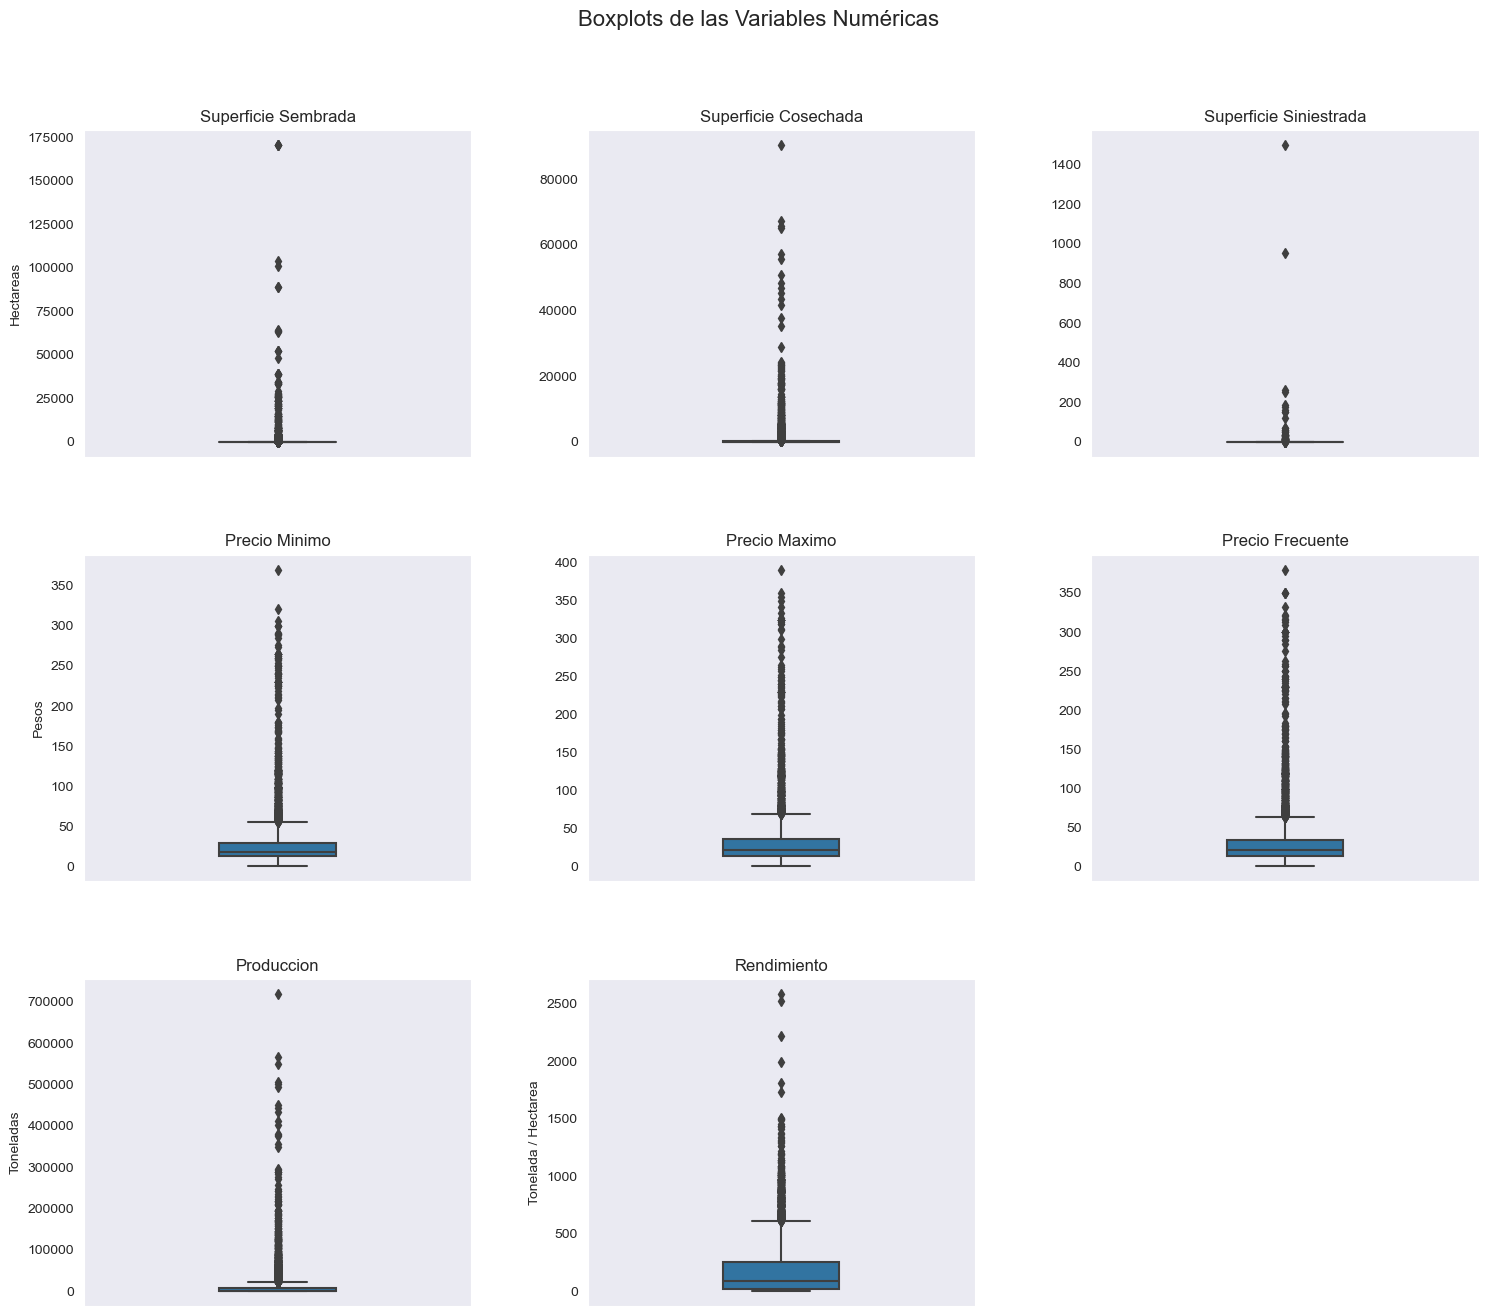

In [42]:
# Fijamos estilo
sns.set_style("dark")

# Lista con re-ordenamiento de las variables numéricas
variables_numericas = ["Superficie Sembrada", "Superficie Cosechada", "Superficie Siniestrada", 
                       "Precio Minimo", "Precio Maximo", "Precio Frecuente", "Produccion", "Rendimiento"]

# Configurar la figura y los subplots
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))
# Ajustar el espacio entre subplots
fig.subplots_adjust(wspace=0.3, hspace=0.3, bottom=-0.1)

# Asegurarse de que 'axes' sea una matriz 2D
axes = axes.reshape(-1)

# Iterar a través de las columnas numéricas y crear boxplots divididos por HeartDisease
for i, variable in enumerate(variables_numericas):
    sns.boxplot(data=df_merge, y=variable, ax=axes[i], width=0.3)
    axes[i].set_title(f'{variable}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Eliminar la subgráfica vacía 
fig.delaxes(axes[-1])

# Agregar un título general a la figura
fig.suptitle('Boxplots de las Variables Numéricas', fontsize=16)

axes[0].set_ylabel('Hectareas')
axes[3].set_ylabel('Pesos')
axes[6].set_ylabel('Toneladas')
axes[7].set_ylabel('Tonelada / Hectarea')

# Ajustar el espaciado entre subplots
#plt.tight_layout()

# Mostrar la figura
plt.show()

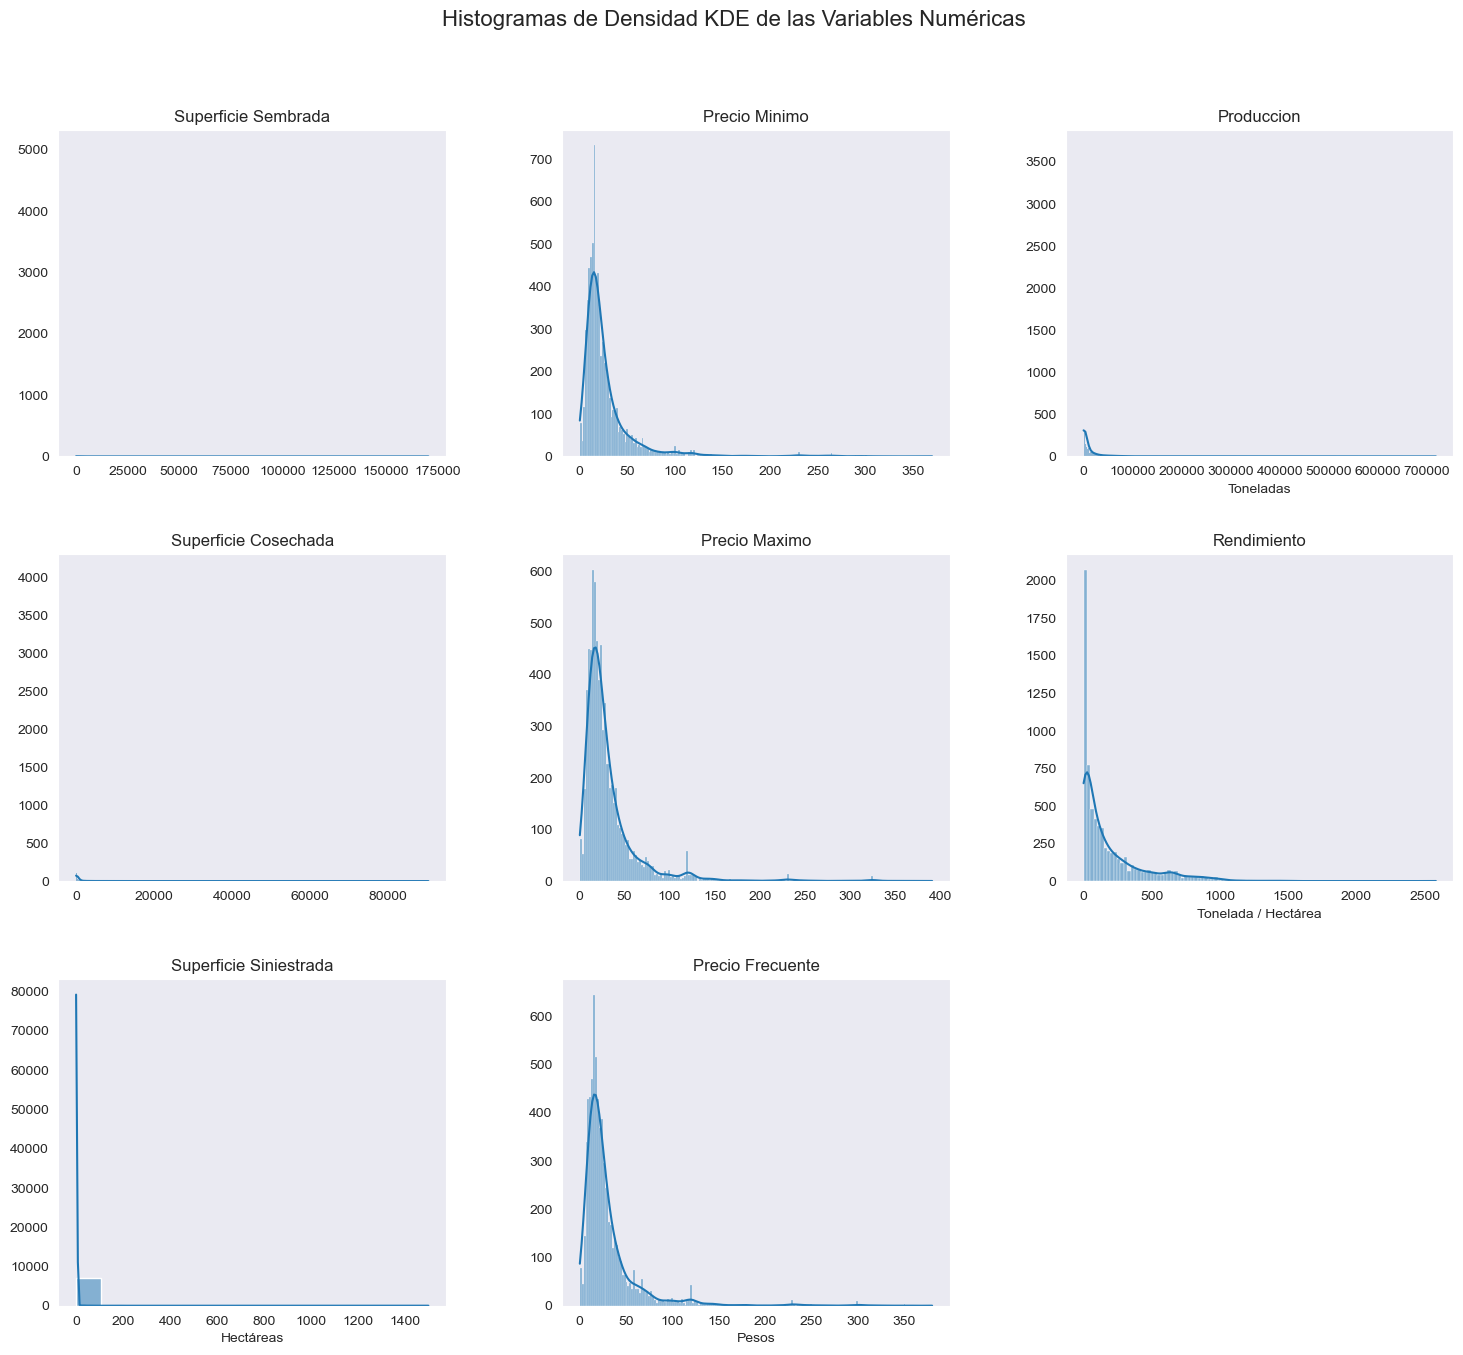

In [43]:
# Lista con re-ordenamiento de las variables numéricas
variables_numericas = ["Superficie Sembrada", 
                       "Precio Minimo", "Produccion", "Superficie Cosechada", "Precio Maximo", "Rendimiento", "Superficie Siniestrada", "Precio Frecuente"]

# Configurar la figura y los subplots
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))
# Ajustar el espacio entre subplots
fig.subplots_adjust(wspace=0.3, hspace=0.3, bottom=-0.1)

# Asegurarse de que 'axes' sea una matriz 2D
axes = axes.reshape(-1)

# Iterar a través de las columnas numéricas y crear histogramas de densidad kde
for i, variable in enumerate(variables_numericas):
    sns.histplot(data=df_merge, x=variable, kde=True, ax=axes[i])
    axes[i].set_title(f'{variable}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Eliminar la subgráfica vacía correspondiente a la variable FastingBS
fig.delaxes(axes[-1])

# Agregar un título general a la figura
fig.suptitle('Histogramas de Densidad KDE de las Variables Numéricas', fontsize=16)

axes[2].set_xlabel('Toneladas')
axes[5].set_xlabel('Tonelada / Hectárea')
axes[6].set_xlabel('Hectáreas')
axes[7].set_xlabel('Pesos')

# Ajustar el espaciado entre subplots
#plt.tight_layout()

# Mostrar la figura
plt.show()


##### Método Local Factor Outlier

In [44]:
# Crear modelo 
clf = LocalOutlierFactor(n_neighbors=20)

# Quitar columnas cualitativas 
X = df_merge.drop(columns=['Año', 'Entidad', 'Mes', 'Cultivo'])

# Buscar outliers
estimado_LOF = clf.fit_predict(X)

# Contar y mostrar resultados
cantidad_outliers_LOF = abs(estimado_LOF[estimado_LOF==-1].sum())
porcentaje_outliers_LOF = cantidad_outliers_LOF / len(df_merge) * 100

print(f"Cantidad de outliers: {cantidad_outliers_LOF}")
print(f"Porcentaje con respecto al total de datos: {porcentaje_outliers_LOF:.2f}%")

Cantidad de outliers: 852
Porcentaje con respecto al total de datos: 12.09%


Inspeccionamos algunos datos outlier según Local Factor Outlier

In [45]:
# Obtener datos outlier según LOF
outliers_LOF = df_merge[(estimado_LOF==-1)]

# Inspeccionar muestras de outliers
outliers_LOF.sample(n=20)

Año         Mes          Entidad                 Cultivo  \
6415  2023       Julio           México            Tomate verde   
140   2020       Enero          Nayarit                 Plátano   
2611  2021      Agosto          Jalisco                 Brócoli   
3970  2022   Noviembre           Sonora                    Nuez   
3850  2022  Septiembre          Nayarit                  Sandía   
5753  2023      Agosto          Sinaloa                  Sandía   
1549  2020       Enero         Veracruz        Toronja (pomelo)   
2101  2021   Noviembre           Sonora                     Uva   
6520  2023       Junio           Puebla                Coliflor   
4076  2022        Mayo   Aguascalientes                 Lechuga   
3208  2021        Mayo         Campeche                 Naranja   
5401  2022   Diciembre        Chihuahua                    Nuez   
4131  2022   Diciembre  Baja California                 Cebolla   
1178  2020  Septiembre           Puebla               Nopalitos   
6443  2023       Enero        Michoacán                   Limón   
206   2020       Enero          Sinaloa  Tomate rojo (jitomate)   
3969  2022     Octubre           Sonora                    Nuez   
1538  2020       Enero         Veracruz                 Plátano   
3765  2022      Agosto          Morelos                 Cebolla   
6238  2023       Marzo          Jalisco                 Durazno   

      Superficie Sembrada  Superficie Cosechada  Superficie Siniestrada  \
6415               606.92                 15.00                     0.0   
140               2516.00                921.50                     0.0   
2611                68.00                  0.00                     0.0   
3970                 0.00               8081.00                     0.0   
3850               130.00                142.00                     0.0   
5753               555.00                  4.27                     0.0   
1549              8003.00               3704.00                     0.0   
2101                 0.00                  0.00                     0.0   
6520               193.00                  0.00                     0.0   
4076               200.00                 60.00                     0.0   
3208                 0.00                568.00                     0.0   
5401                 0.00              28829.36                     0.0   
4131                 0.00                  2.00                     0.0   
1178                 0.00                  0.00                     0.0   
6443             63393.50              57267.23                     0.0   
206              10358.59               9776.67                     0.0   
3969                 0.00               4451.00                     0.0   
1538             16589.72               5148.14                     0.0   
3765               221.50                  0.00                     0.0   
6238                 0.00                 43.00                     0.0   

      Produccion  Rendimiento  Precio Minimo  Precio Maximo  Precio Frecuente  \
6415      225.00       191.40      10.380952      12.380952         11.380952   
140       884.34         2.50      22.000000      26.000000         24.000000   
2611        0.00       184.46      22.000000      32.000000         28.000000   
3970     7797.85        59.12     100.000000     120.000000        109.750000   
3850      245.00       137.35      12.809524      12.809524         12.809524   
5753      104.00       228.84       9.500000      10.673913         10.304348   
1549    60583.27       268.66      20.000000      20.000000         20.000000   
2101        0.00       209.15      52.250000      64.750000         64.750000   
6520        0.00       379.82      19.863636      23.045455         20.863636   
4076     1980.00        81.00       6.833333       8.952381          7.714286   
3208     3516.55        37.56       0.812500       0.950000          0.950000   
5401    40503.66        50.56     265.000000     32

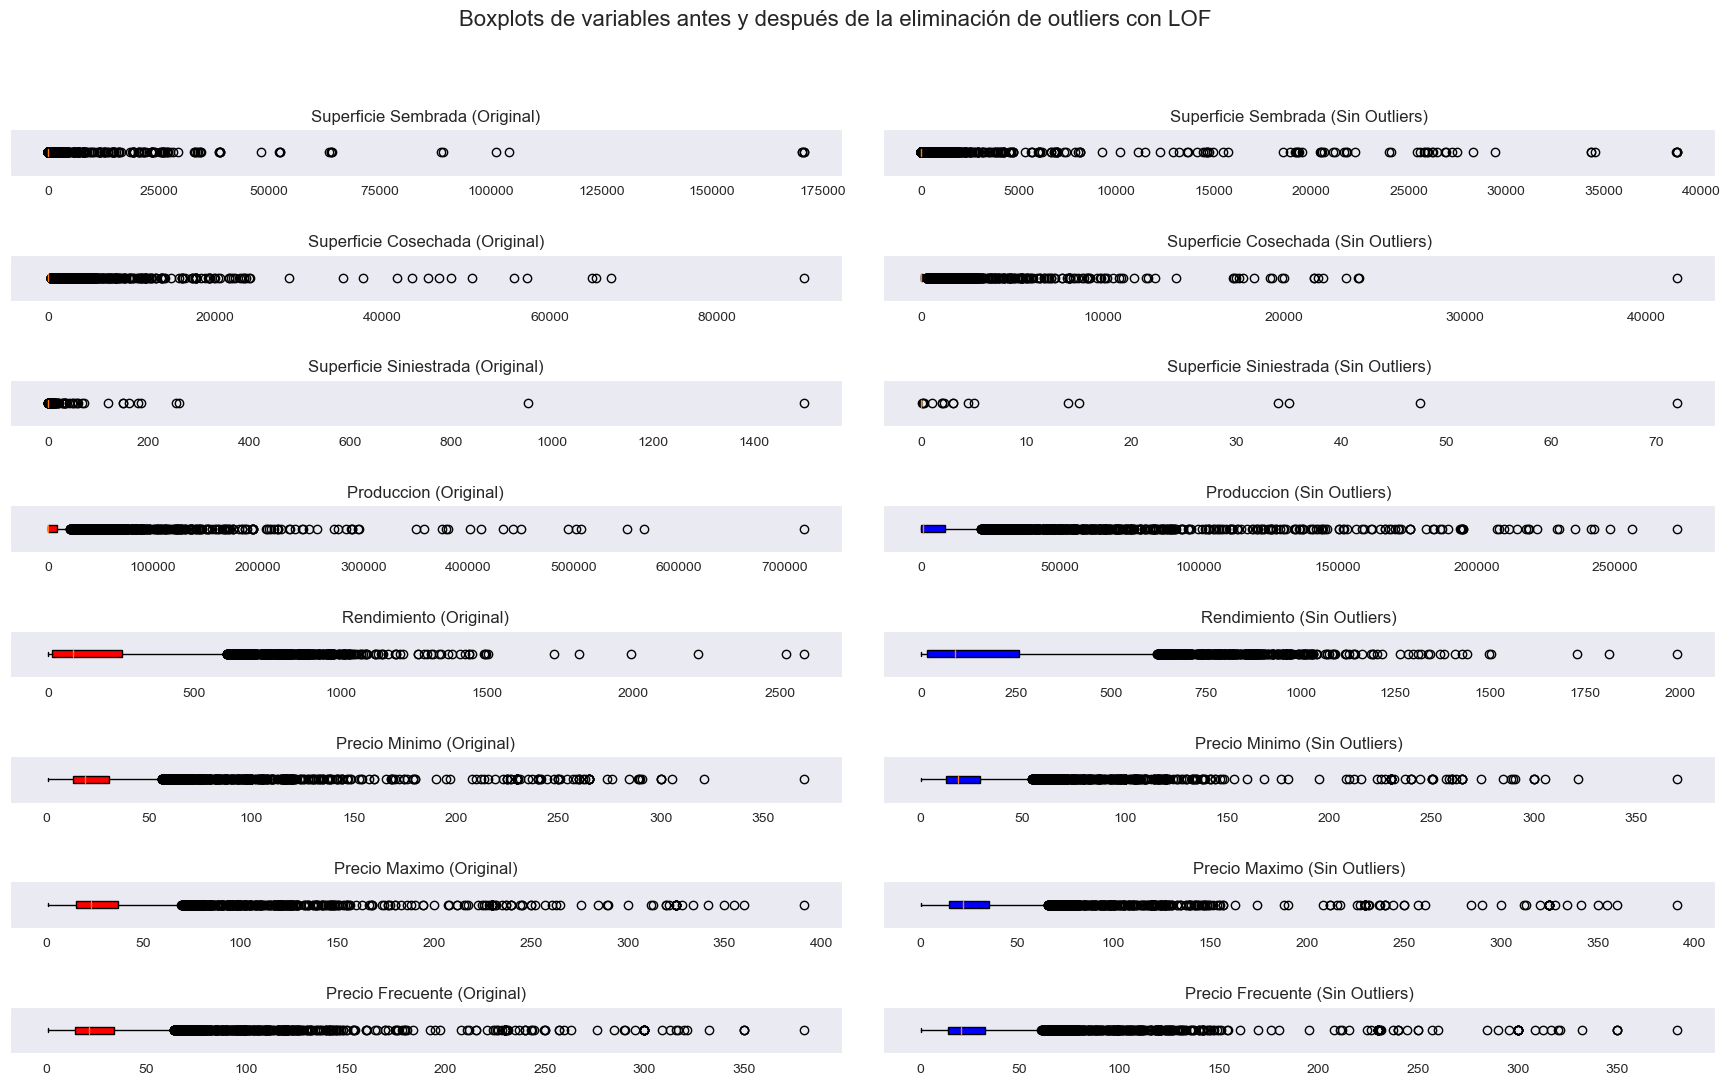

In [46]:
# Eliminar outliers del DataFrame
df_clean_LOF = df_merge[~(estimado_LOF==-1)]

# Configurar la figura y los subplots con orientación horizontal
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(22, 12))

# Iterar a través de las columnas numéricas y crear boxplots horizontales
for i, variable in enumerate(VARIABLES_NUMERICAS):
    # Boxplot original en rojo con relleno rojo
    axes[i, 0].boxplot(df_merge[variable], vert=False, patch_artist=True, boxprops=dict(facecolor='red'))
    axes[i, 0].set_title(f'{variable} (Original)')

    # Boxplot sin outliers en azul con relleno azul
    axes[i, 1].boxplot(df_clean_LOF[variable], vert=False, patch_artist=True, boxprops=dict(facecolor='blue'))
    axes[i, 1].set_title(f'{variable} (Sin Outliers)')

    # Eliminar las etiquetas en la columna de la derecha
    axes[i, 0].set_yticklabels([])
    axes[i, 1].set_yticklabels([])

# Ajustar el espaciado entre subplots
#plt.tight_layout()

# Agregar un título general a la figura
fig.suptitle('Boxplots de variables antes y después de la eliminación de outliers con LOF', fontsize=16)

# Ajustar el espaciado entre subplots verticalmente
plt.subplots_adjust(hspace=1.7, wspace=0.05)

# Mostrar la figura
plt.show()

##### Método Isolation Forest

In [47]:
# Crear modelo Isolation Forest
random_state = np.random.RandomState(42)
clf = IsolationForest(n_estimators=100,max_samples='auto',random_state=random_state)  # Puedes ajustar el parámetro de contaminación según tus necesidades

# Quitar columnas cualitativas
X = df_merge.drop(columns=['Año', 'Entidad', 'Mes', 'Cultivo'])

# Entrenar el modelo y predecir outliers
estimado_IF = clf.fit_predict(X)

# Contar y mostrar resultados
cantidad_outliers_IF = len(estimado_IF[estimado_IF == -1])
porcentaje_outliers_IF = cantidad_outliers_IF / len(df_merge) * 100

print(f"Cantidad de outliers: {cantidad_outliers_IF}")
print(f"Porcentaje con respecto al total de datos: {porcentaje_outliers_IF:.2f}%")


Cantidad de outliers: 430
Porcentaje con respecto al total de datos: 6.10%


Inspeccionamos algunos datos outlier según Isolation Forest

In [48]:
# Obtener datos outlier según IF
outliers_IF = df_merge[(estimado_IF==-1)]

# Inspeccionar muestras de outliers
outliers_IF.sample(n=20)

Año         Mes          Entidad                 Cultivo  \
2559  2021   Diciembre          Durango                    Nuez   
2944  2021       Marzo        Michoacán                   Mango   
288   2020        Mayo           Sonora                     Uva   
247   2020       Enero           Sonora                    Nuez   
5756  2023     Febrero          Sinaloa  Tomate rojo (jitomate)   
228   2020     Febrero           Sonora                 Cebolla   
6472  2023       Marzo        Michoacán                  Papaya   
3124  2021  Septiembre        Zacatecas             Chile verde   
4138  2022     Octubre  Baja California             Chile verde   
6841  2023      Agosto         Veracruz                 Naranja   
7016  2023       Enero       Nuevo León                 Naranja   
1978  2021        Mayo          Sinaloa             Chile verde   
5396  2022       Julio        Chihuahua                    Nuez   
5807  2023       Junio           Sonora                     Uva   
1697  2020       Enero          Tabasco                 Plátano   
5307  2022       Enero          Chiapas                   Mango   
6823  2023      Agosto         Veracruz                   Limón   
4161  2022  Septiembre  Baja California                   Fresa   
1315  2020   Noviembre         Campeche             Chile verde   
1362  2020       Abril           Colima                   Limón   

      Superficie Sembrada  Superficie Cosechada  Superficie Siniestrada  \
2559                 0.00               1978.63                     0.0   
2944                 0.00              19318.84                     0.0   
288                  0.00               1636.74                     0.0   
247              18571.03                  0.00                     0.0   
5756               368.50               1634.00                     0.0   
228                 92.41                131.00                    21.0   
6472                 0.00                  0.00                     0.0   
3124                 0.00              12887.81                     0.0   
4138                 0.00                260.50                     8.0   
6841                 0.00               4942.31                     0.0   
7016             26025.50               9317.00                     0.0   
1978                 0.00               1448.60                     0.0   
5396                 0.00                  0.00                     0.0   
5807                 0.00               9685.00                     0.0   
1697             11684.42              11634.42                     0.0   
5307             38775.35              21907.89                     0.0   
6823                 0.00               3271.00                     0.0   
4161                 0.00                375.00                     0.0   
1315                 0.00                341.00                    16.0   
1362                 0.00                  0.00                     0.0   

      Produccion  Rendimiento  Precio Minimo  Precio Maximo  Precio Frecuente  \
2559     3802.71        36.26     160.000000     167.692308        160.384615   
2944    13932.21        34.17      33.750000      44.576818         43.571364   
288     26213.00        78.41     103.647414     121.048103        109.111552   
247         0.00         0.00      90.000000     110.000000        110.000000   
5756   123322.54       565.50      36.603158      47.002895         42.771053   
228      3356.12       148.16      11.200000      13.000000         13.000000   
6472    12056.05       170.65     258.727273     260.727273        259.727273   
3124   134244.24       230.50      26.485714      28.485714         27.485714   
4138     4570.37        34.46      11.668452      11.668452         11.668452   
6841   228944.14      1008.17      26.250543      28.372826         26.998370   
7016     8702.60         5.50      22.496136      24.826364         24.212727   
1978    89510.98       594.87      47.715385      6

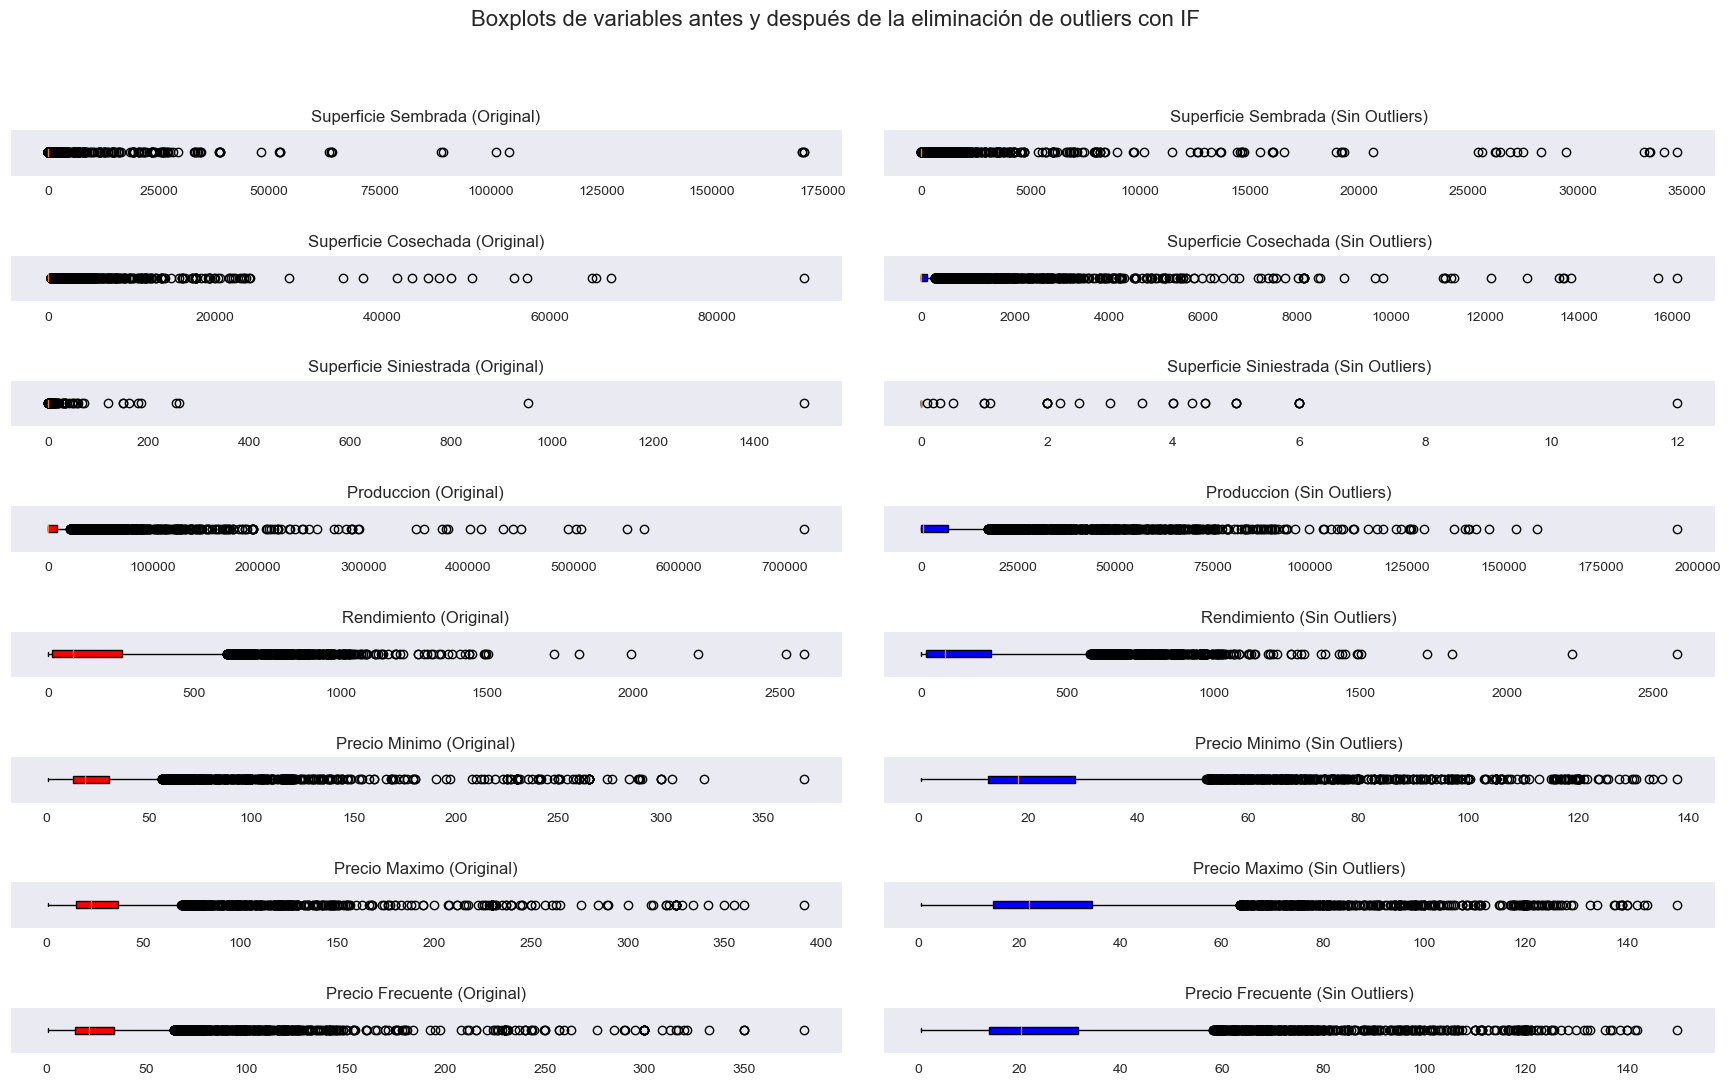

In [49]:
# Eliminar outliers del DataFrame
df_clean_IF = df_merge[~(estimado_IF==-1)]

# Configurar la figura y los subplots con orientación horizontal
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(22, 12))

# Iterar a través de las columnas numéricas y crear boxplots horizontales
for i, variable in enumerate(VARIABLES_NUMERICAS):
    # Boxplot original en rojo con relleno rojo
    axes[i, 0].boxplot(df_merge[variable], vert=False, patch_artist=True, boxprops=dict(facecolor='red'))
    axes[i, 0].set_title(f'{variable} (Original)')

    # Boxplot sin outliers en azul con relleno azul
    axes[i, 1].boxplot(df_clean_IF[variable], vert=False, patch_artist=True, boxprops=dict(facecolor='blue'))
    axes[i, 1].set_title(f'{variable} (Sin Outliers)')

    # Eliminar las etiquetas en la columna de la derecha
    axes[i, 0].set_yticklabels([])
    axes[i, 1].set_yticklabels([])

# Ajustar el espaciado entre subplots
#plt.tight_layout()

# Agregar un título general a la figura
fig.suptitle('Boxplots de variables antes y después de la eliminación de outliers con IF', fontsize=16)

# Ajustar el espaciado entre subplots verticalmente
plt.subplots_adjust(hspace=1.7, wspace=0.05)

# Mostrar la figura
plt.show()

En ambos casos, la inspección de los outliers putativos no nos permite identificarlos como verdaderamente valores atípicos.Es normal que ciertos cultivos, como la nuez, se mantengan con precios muy por encima de otros cultivos. Además, es esperable que en ciertas épocas, la producción de ciertos cultivos incremente de manera significativa. Por esto y otros factores, decidimos conservar los outliers putativos y continuar el EDA con el DataFrame completo.  

## Relaciones entre variables por visualización

In [50]:
# Magic command para hacer gráficas interactivas
#%matplotlib widget

### Análisis temporal: ¿En qué épocas del año es más probable que se generen excedentes? 

Analizamos la evolución de las variables númericas a lo largo de los años, para cada uno de los cultivos de interés. Para esto, vamos a ignorar la información geográfica, promediando los valores a lo largo de todos los estados.

In [51]:
# Promediamos por año, mes y cultivo
df_año_mes_cult = df_merge.groupby(['Año', 'Mes', 'Cultivo'])[VARIABLES_NUMERICAS].mean().reset_index()

# Ordenamos el DataFrame con base en el orden cronológico de los meses
df_año_mes_cult['Mes'] = pd.Categorical(df_año_mes_cult['Mes'], categories=MESES_CRONOLOGICO, ordered=True)  # Convertir 'Mes' en una categoría con el orden cronológico
df_año_mes_cult = df_año_mes_cult.sort_values(by='Mes')  # Ordenar DataFrame con base en la columna 'Mes'

In [52]:
# Función para obtener la etiqueta del eje y según el tipo de variable
def get_label(variable):
    if variable in ['Superficie Sembrada', 'Superficie Cosechada', 'Superficie Siniestrada']:
        return 'Hectáreas'
    elif variable in ['Precio Minimo', 'Precio Maximo', 'Precio Frecuente']:
        return 'Pesos'
    elif variable == 'Produccion':
        return 'Toneladas'
    elif variable == 'Rendimiento':
        return 'Tonelada/Hectárea'
    else:
        return ''

In [53]:
# Fijamos estilo
sns.set_style("white")

# Función para actualizar el gráfico según el cultivo y variable seleccionados
def update_plot(cultivo, variable):
    plt.figure(figsize=(12, 8))

    if cultivo == 'Todos los cultivos':
        # Graficar la producción promedio de todos los cultivos
        sns.barplot(x='Mes', y=variable, hue='Año', data=df_año_mes_cult, palette=COLORES, ci=False, estimator='mean')
        title = f'{variable} Promedio de Todos los Cultivos por Mes y Año'
    else:
        # Graficar la producción del cultivo seleccionado
        sns.barplot(x='Mes', y=variable, hue='Año', data=df_año_mes_cult[df_año_mes_cult['Cultivo'] == cultivo], palette=COLORES, ci=False)
        title = f'{variable} de {cultivo} por Mes y Año'

    # Añadir título y etiquetas a los ejes
    plt.title(title)
    plt.xlabel('Mes')

    # Añadir label y dinámico al eje y
    plt.ylabel(get_label(variable))

    # Mostrar la leyenda
    plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Mostrar el gráfico
    plt.show()

# Añadir la opción "Todos los cultivos" a la lista de cultivos
cultivos_con_todos = ['Todos los cultivos'] + CULTIVOS_UNICOS

# Crear los widgets de selección
cultivo_selector = widgets.Dropdown(options=cultivos_con_todos, value='Todos los cultivos', description='Cultivo')
variable_selector = widgets.Dropdown(options=VARIABLES_NUMERICAS, value='Produccion', description='Variable')

# Crear la interfaz interactiva
interact(update_plot, cultivo=cultivo_selector, variable=variable_selector)


interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Berenjena', 'Brócoli', '…

<function __main__.update_plot(cultivo, variable)>

Para facilitar el análisis comparativo entre los distintos años, repetimos la gráfica pero ahora de manera acumulada. Esto no solo facilita comparar los patrones de evolución a lo largo de cada año, sino que permite comparar los valores totales de cada año simplemente inspeccionando el mes de Diciembre. 

In [54]:
# Función para actualizar el gráfico acumulado según el cultivo y variable seleccionados
def update_plot(cultivo, variable):
    plt.figure(figsize=(12, 8))

    if cultivo == 'Todos los cultivos':
        # Graficar la producción acumulada promedio de todos los cultivos
        df_plot = df_año_mes_cult.groupby(['Año', 'Mes'])[variable].mean().groupby('Año').cumsum().reset_index()
        sns.barplot(x='Mes', y=variable, hue='Año', data=df_plot, palette=COLORES, ci=False)
        title = f'{variable} Acumulado Promedio de Todos los Cultivos por Mes y Año'
    else:
        # Graficar la producción acumulada del cultivo seleccionado
        df_plot = df_año_mes_cult[df_año_mes_cult['Cultivo'] == cultivo].groupby(['Año', 'Mes'])[variable].mean().groupby('Año').cumsum().reset_index()
        sns.barplot(x='Mes', y=variable, hue='Año', data=df_plot, palette=COLORES, ci=False)
        title = f'{variable} Acumulado de {cultivo} por Mes y Año'

    # Añadir título y etiquetas a los ejes
    plt.title(title)
    plt.xlabel('Mes')
    
    # Añadir label y dinámico al eje y
    plt.ylabel(get_label(variable))

    # Mostrar la leyenda
    plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Mostrar el gráfico
    plt.show()

# Añadir la opción "Todos los cultivos" a la lista de cultivos
cultivos_con_todos = ['Todos los cultivos'] + list(df_año_mes_cult['Cultivo'].unique())

# Crear los widgets de selección
cultivo_selector = widgets.Dropdown(options=cultivos_con_todos, value='Todos los cultivos', description='Cultivo')
variable_selector = widgets.Dropdown(options=VARIABLES_NUMERICAS, value='Produccion', description='Variable')

# Crear la interfaz interactiva
interact(update_plot, cultivo=cultivo_selector, variable=variable_selector)


interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Zarzamora', 'Papa', 'Pap…

<function __main__.update_plot(cultivo, variable)>

Habiendo analizado el patrón de evolución a lo largo de los meses de los distintos años, procedemos a identificar cuáles son, en promedio, los meses con mejores métricas.

In [55]:
# Promediar los valores entre todos los años
df_promedio_anual = df_año_mes_cult.groupby('Mes')[VARIABLES_NUMERICAS].mean().reset_index()

# Función para actualizar el gráfico de barras horizontales según la variable y el cultivo seleccionados
def update_plot(cultivo, variable):
    plt.figure(figsize=(12, 8))

    if cultivo == 'Todos los cultivos':
        # Graficar barras horizontales para el promedio de todos los cultivos
        order = df_promedio_anual.groupby('Mes')[variable].mean().sort_values(ascending=False).index
        color_palette = ['limegreen' if i < 3 else 'lightcoral' if i == len(order) - 1 else 'lightgrey' for i in range(len(order))]
        ax = sns.barplot(x=variable, y='Mes', data=df_promedio_anual, ci=False, palette=color_palette, order=order)
        title = f'Promedio anual de {variable} para todos los cultivos por mes'
    else:
        # Filtrar datos por cultivo
        df_cultivo = df_año_mes_cult[df_año_mes_cult['Cultivo'] == cultivo]

        # Graficar barras horizontales y ordenar los datos directamente en la función de graficado
        order = df_cultivo.groupby('Mes')[variable].mean().sort_values(ascending=False).index
        color_palette = ['limegreen' if i < 3 else 'lightcoral' if i == len(order) - 1 else 'lightgrey' for i in range(len(order))]
        ax = sns.barplot(x=variable, y='Mes', data=df_cultivo, ci=False, palette=color_palette, order=order)
        title = f'Promedio anual de {variable} para {cultivo} por Mes'

    # Añadir título y etiquetas a los ejes
    plt.title(title, pad=20)
    plt.xlabel(f'{variable} Promedio Anual')
    plt.ylabel('Mes')

    # Añadir label x dinámico
    plt.xlabel(get_label(variable))

    # Eliminar bordes
    plt.gca().spines['left'].set_visible(False)  # Izquierdo
    plt.gca().spines['top'].set_visible(False)   # Superior
    plt.gca().spines['right'].set_visible(False) # Derecho
    plt.gca().spines['bottom'].set_visible(False) # Inferior

    # Eliminar xticks
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    # Añadir valores en la parte superior de las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10, color='black')

    # Mostrar el gráfico
    plt.show()

# Añadir la opción "Todos los cultivos" a la lista de cultivos
cultivos_con_todos = ['Todos los cultivos'] + df_año_mes_cult['Cultivo'].unique().tolist()

# Crear los widgets de selección
cultivo_selector = widgets.Dropdown(options=cultivos_con_todos, value='Todos los cultivos', description='Cultivo')
variable_selector = widgets.Dropdown(options=VARIABLES_NUMERICAS, value='Produccion', description='Variable')

# Crear la interfaz interactiva
interact(update_plot, cultivo=cultivo_selector, variable=variable_selector)

interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Zarzamora', 'Papa', 'Pap…

<function __main__.update_plot(cultivo, variable)>

Procedemos a analizar la evolución de las distintas variables numéricas pero ahora a lo largo de todo el periodo del que se tienen datos. Prestamos especial interés a los meses identificados con mejores y peores métricas.

In [56]:
# Creamos una copia de nuestro DataFrame
df_merge_fechas = df_merge.copy()

# Asegúrate de tener las columnas Año y Mes en formato string
df_merge_fechas['Año'] = df_merge_fechas['Año'].astype(str)
df_merge_fechas['Mes'] = df_merge_fechas['Mes'].astype(str)

# Mapea los nombres de los meses a números
meses_dict = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6,
    'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}
df_merge_fechas['Mes'] = df_merge_fechas['Mes'].map(meses_dict)

# Combina las columnas Año y Mes en una nueva columna 'Fecha'
df_merge_fechas['Fecha'] = pd.to_datetime(df_merge_fechas['Año'] + '-' + df_merge_fechas['Mes'].astype(str), format='%Y-%m')

# Agrupa por mes y año y calcula el promedio de las columnas numéricas
df_grouped = df_merge_fechas.groupby(['Fecha', 'Cultivo'])[VARIABLES_NUMERICAS].mean().reset_index()

# Filtra los datos para el rango de fechas que deseas
start_date = '2019-12-25'
end_date = '2023-09-10'
df_filtered = df_grouped[(df_grouped['Fecha'] >= start_date) & (df_grouped['Fecha'] <= end_date)]

In [57]:
# Función para graficar
def plot_graph(cultivo, variable):
    plt.subplots(1, 1, figsize=(12, 8))
    
    if cultivo == 'Todos los cultivos':
        # Grafica el promedio de la variable para todos los cultivos
        df_all_cultivos_var1 = df_filtered.groupby('Fecha')[variable].mean().reset_index()
        plt.plot(df_all_cultivos_var1['Fecha'], df_all_cultivos_var1[variable], marker='o', linestyle='-', color='b', label=variable)

        # Añadir título
        plt.title(f'{variable} de todos los cultivos', pad=30, fontsize=16, fontweight='bold', va='center')

    else:
        # Filtra por el cultivo seleccionado
        df_cultivo = df_filtered[df_filtered['Cultivo'] == cultivo]
        
        # Grafica el promedio de la variable1 para el cultivo seleccionado
        plt.plot(df_cultivo['Fecha'], df_cultivo[variable], marker='o', linestyle='-', color='b', label=variable)
        
        # Añadir título
        plt.title(f'{variable} de {cultivo}', pad=30)

    # Etiquetas para el eje y
    plt.ylabel(get_label(variable), labelpad=20)

    plt.xlabel('Fecha', labelpad=20)
    plt.tight_layout()
    
    # Fijar el rango del eje x
    plt.xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
        
    plt.show()

# Añadir opción "Todos los cultivos" al widget de cultivos
cultivos_unicos = ['Todos los cultivos'] + CULTIVOS_UNICOS

# Crea los widgets interactivos
interact(plot_graph, 
         cultivo=widgets.Dropdown(options=cultivos_unicos, value='Todos los cultivos', description='Cultivo'),
         variable=widgets.Dropdown(options=variables_numericas, value='Superficie Sembrada', description='Variable'))

interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Berenjena', 'Brócoli', '…

<function __main__.plot_graph(cultivo, variable)>

Podemos inspeccionar simultaneamente la evolución de las distintas parejas de variables numéricas en busca de alguna relación significativa.

In [58]:
# Función para graficar
def plot_graph(cultivo, variable1, variable2):
    fig, axs = plt.subplots(2, 1, figsize=(12, 12))
    
    if cultivo == 'Todos los cultivos':
        # Grafica el promedio de la variable1 para todos los cultivos
        df_all_cultivos_var1 = df_filtered.groupby('Fecha')[variable1].mean().reset_index()
        axs[0].plot(df_all_cultivos_var1['Fecha'], df_all_cultivos_var1[variable1], marker='o', linestyle='-', color='b', label=variable1)
        axs[0].legend(loc='upper right')
        axs[0].set_xticks([])  # Elimina las marcas del eje x
        
        # Grafica el promedio de la variable2 para todos los cultivos
        df_all_cultivos_var2 = df_filtered.groupby('Fecha')[variable2].mean().reset_index()
        axs[1].plot(df_all_cultivos_var2['Fecha'], df_all_cultivos_var2[variable2], marker='o', linestyle='-', color='r', label=variable2)
        axs[1].legend(loc='upper right')
        
        # Calcular la correlación
        corr_value = df_all_cultivos_var1[variable1].corr(df_all_cultivos_var2[variable2])
        # Añadir el valor de correlación como texto en la figura
        fig.text(1.07, 0.505, f'Corr: {corr_value:.2f}', ha='center', va='center', fontsize=18, fontweight='bold')

        # Añadir título superior
        suptitle = f'{variable1} vs {variable2} de {cultivo}'
        suptitle_obj = fig.suptitle(suptitle, fontsize=16, fontweight='bold', va='center')
        # Ajustar la posición vertical del título superior
        suptitle_obj.set_y(1)

    else:
        # Filtra por el cultivo seleccionado
        df_cultivo = df_filtered[df_filtered['Cultivo'] == cultivo]
        
        # Grafica el promedio de la variable1 para el cultivo seleccionado
        axs[0].plot(df_cultivo['Fecha'], df_cultivo[variable1], marker='o', linestyle='-', color='b', label=variable1)
        axs[0].legend(loc='upper right')
        axs[0].set_xticks([])  # Elimina las marcas del eje x
        
        # Grafica el promedio de la variable2 para el cultivo seleccionado
        axs[1].plot(df_cultivo['Fecha'], df_cultivo[variable2], marker='o', linestyle='-', color='r', label=variable2)
        axs[1].legend(loc='upper right')

        # Calcular la correlación
        corr_value = df_cultivo[variable1].corr(df_cultivo[variable2])
        # Añadir el valor de correlación como texto en la figura
        fig.text(1.07, 0.515, f'Corr: {corr_value:.2f}', ha='center', va='center', fontsize=14, fontweight='bold')

        # Añadir título superior
        suptitle = f'{variable1} vs {variable2} de {cultivo}'
        suptitle_obj = fig.suptitle(suptitle, fontsize=16, fontweight='bold', va='center')
        # Ajustar la posición vertical del título superior
        suptitle_obj.set_y(1)

    # Etiquetas para el eje y
    axs[0].set_ylabel(get_label(variable1))
    axs[1].set_ylabel(get_label(variable2))

    plt.xlabel('Fecha')
    plt.tight_layout()
    
    # Fijar el rango del eje x
    plt.xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
        
    plt.show()

# ... (código para obtener opciones de widgets)

# Añadir opción "Todos los cultivos" al widget de cultivos
cultivos_unicos = ['Todos los cultivos'] + CULTIVOS_UNICOS

# Crea los widgets interactivos
interact(plot_graph, 
         cultivo=widgets.Dropdown(options=cultivos_unicos, value='Todos los cultivos', description='Cultivo'),
         variable1=widgets.Dropdown(options=variables_numericas, value='Superficie Sembrada', description='Variable 1'),
         variable2=widgets.Dropdown(options=variables_numericas, value='Superficie Cosechada', description='Variable 2'))

interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Berenjena', 'Brócoli', '…

<function __main__.plot_graph(cultivo, variable1, variable2)>

### Análisis geográfico: ¿En qué ubicaciones es más probable que se generen excedentes? 

In [59]:
import geopandas
geo_df = geopandas.read_file("https://gist.githubusercontent.com/walkerke/76cb8cc5f949432f9555/raw/363c297ce82a4dcb9bdf003d82aa4f64bc695cf1/mx.geojson")
geo_df.head()

id                 name                state  mus09  pri10  sec10  ter10  \
0   1       Aguascalientes       Aguascalientes   17.1   6.34  28.74  64.28   
1   2      Baja California      Baja California   15.4   5.44  31.64  61.68   
2   3  Baja California Sur  Baja California Sur    3.0   9.18  17.48  72.37   
3   4             Campeche             Campeche    7.0  19.24  21.20  57.11   
4   5              Chiapas              Chiapas   13.9  42.76  13.51  42.90   

    gdp08  other10                                           geometry  
0   84.70     0.64  MULTIPOLYGON (((-102.21140 22.35450, -102.1908...  
1   83.07     1.24  MULTIPOLYGON (((-114.09429 28.02418, -114.0774...  
2   94.64     0.97  MULTIPOLYGON (((-109.79843 24.15516, -109.8028...  
3  395.55     2.45  MULTIPOLYGON (((-91.52440 18.76659, -91.52457 ...  
4   34.44     0.83  MULTIPOLYGON (((-93.97061 16.00979, -93.96390 ...

<Axes: >

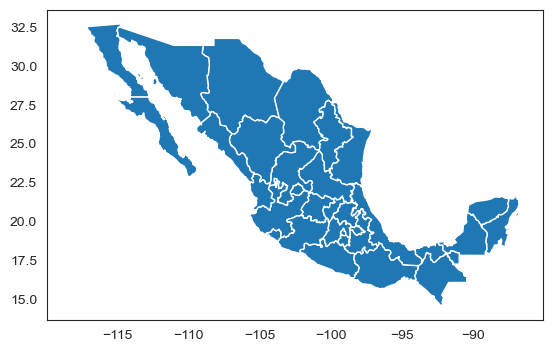

In [60]:
geo_df.plot()

## Correlación entre variables

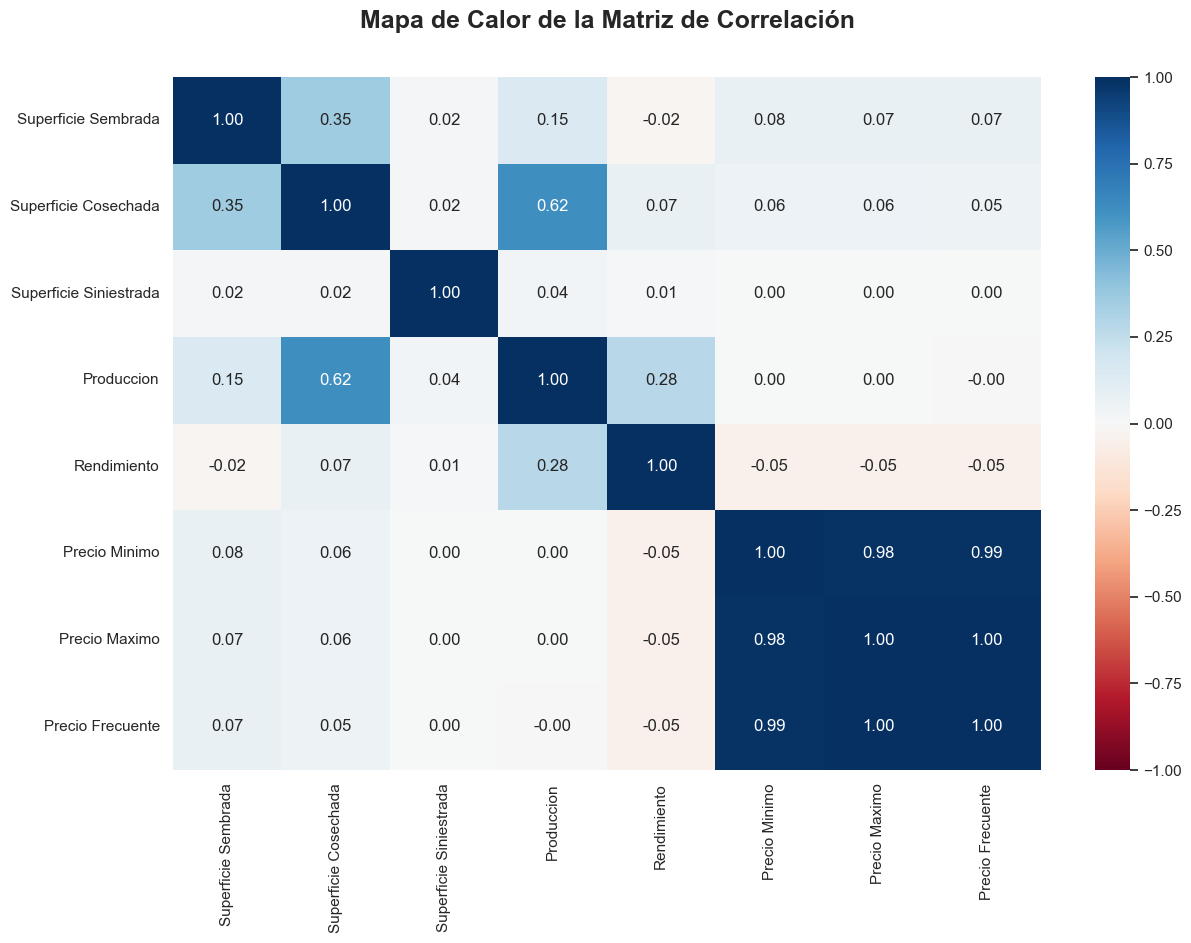

In [61]:
# Calcula la matriz de correlación
correlation_matrix = df_merge[VARIABLES_NUMERICAS].corr()

# Fijar estilo
sns.set(style="white")

# Crea un mapa de calor de la matriz de correlación
plt.figure(figsize = (14,9))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="RdBu", fmt=".2f", vmin=-1, vmax=1)
plt.title('Mapa de Calor de la Matriz de Correlación', pad=40, ha='center', va='center', fontsize=18, fontweight='bold')
# Rotar los labels del eje x a 90 grados
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

#Mostrar gráfica
plt.show()
     

# Pandas Profiling

In [62]:
# Código para visualizar mejor los reportes en jupyter
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [63]:
# Código para obtener un super resumen automático de los datos

!pip install -U ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df_siap, title="Pandas Profiling Report - SIAP")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [64]:
#Exportamos el reporte a un archivo html que es guardado en la misma carpeta. 
profile.to_file('pandas-profiling-report')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]